In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [2]:
from sklearn import linear_model as lm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('chocolate.csv')
df

Unnamed: 0   ref   company company_location  review_date  \
0              0  2454      5150            U.S.A         2019   
1              1  2458      5150            U.S.A         2019   
2              2  2454      5150            U.S.A         2019   
3              3   797  A. Morin           France         2012   
4              4   797  A. Morin           France         2012   
...          ...   ...       ...              ...          ...   
2219        2219  1205    Zotter          Austria         2014   
2220        2220  1996    Zotter          Austria         2017   
2221        2221  2170    Zotter          Austria         2018   
2222        2222  2170    Zotter          Austria         2018   
2223        2223  2036    Zotter          Austria         2018   

     country_of_bean_origin specific_bean_origin_or_bar_name  cocoa_percent  \
0                Madagascar           Bejofo Estate, batch 1           76.0   
1        Dominican republic                  Zorzal, batch 1           76.0   
2                  Tanzania            Kokoa Kamili, batch 1           76.0   
3                      Peru                             Peru           63.0   
4                   Bolivia                          Bolivia           70.0   
...                     ...                              ...            ...   
2219                  Blend                              Raw           80.0   
2220               Colombia                 APROCAFA, Acandi           75.0   
2221                 Belize                         Maya Mtn           72.0   
2222                  Congo            Mountains of the Moon           70.0   
2223                  Blend  Dry Aged, 30 yr Anniversary bar           75.0   

      rating  counts_of_ingredients  ...       cocoa_butter          vanilla  \
0       3.75                      3  ...  have_cocoa_butter  have_not_vanila   
1       3.50                      3  ...  have_cocoa_butter  have_not_vanila   
2       3.25                      3  ...  have_cocoa_butter  have_not_vanila   
3       3.75                      4  ...  have_cocoa_butter  have_not_vanila   
4       3.50                      4  ...  have_cocoa_butter  have_not_vanila   
...      ...                    ...  ...                ...              ...   
2219    2.75                      4  ...  have_cocoa_butter  have_not_vanila   
2220    3.75                      3  ...  have_cocoa_butter  have_not_vanila   
2221    3.50                      3  ...  have_cocoa_butter  have_not_vanila   
2222    3.25                      3  ...  have_cocoa_butter  have_not_vanila   
2223    3.00                      3  ...  have_cocoa_butter  have_not_vanila   

               lecithin           salt           sugar  \
0     have_not_lecithin  have_not_salt      have_sugar   
1     have_not_lecithin  have_not_salt      have_sugar   
2     have_not_lecithin  have_not_salt      have_sugar   
3         have_lecithin  have_not_salt      have_sugar   
4         have_lecithin  have_not_salt      have_sugar   
...                 ...            ...             ...   
2219  have_not_lecithin      have_salt  have_not_sugar   
2220  have_not_lecithin  have_not_salt      have_sugar   
2221  have_not_lecithin  have_not_salt      have_sugar   
2222  have_not_lecithin  have_not_salt      have_sugar   
2223  have_not_lecithin  have_not_salt      have_sugar   

               sweetener_without_sugar   first_taste second_taste third_taste  \
0     have_not_sweetener_without_sugar         cocoa   blackberry   full body   
1     have_not_sweetener_without_sugar         cocoa      vegetal      savory   
2     have_not_sweetener_without_sugar    rich cocoa        fatty      bready   
3     have_not_sweetener_without_sugar        fruity        melon      roasty   
4     have_not_sweetener_without_sugar       vegetal        nutty         NaN   
...                                ...           ...          ...         ...   
2219      have_sweetener_without_sugar 

Možemo li predvidjeti ocjenu iz postotka kakaa?

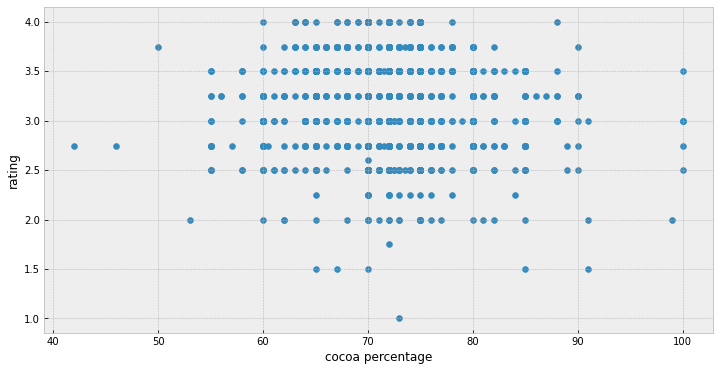

In [3]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage')
plt.ylabel('rating')
plt.scatter(df.cocoa_percent, df.rating)
plt.show()

In [4]:
reg = lm.LinearRegression()
reg.fit(df[['cocoa_percent']], df.rating)

LinearRegression()

In [5]:
print(reg.coef_)
print(reg.intercept_)

[-0.00646015]
3.6604227762507118


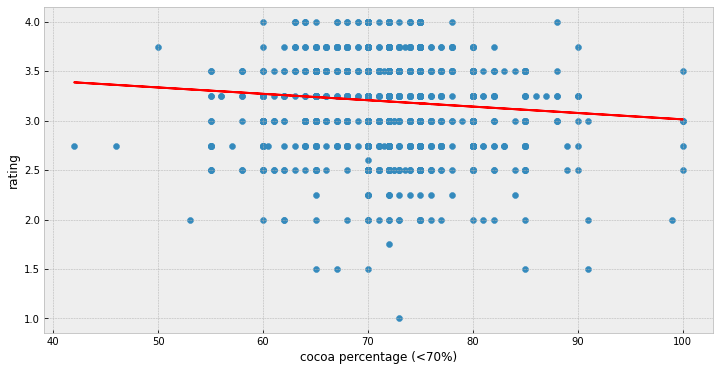

In [6]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (<70%)')
plt.ylabel('rating')
plt.scatter(df.cocoa_percent, df.rating)
plt.plot(df.cocoa_percent, reg.predict(df[['cocoa_percent']]), color = 'red')
plt.show()

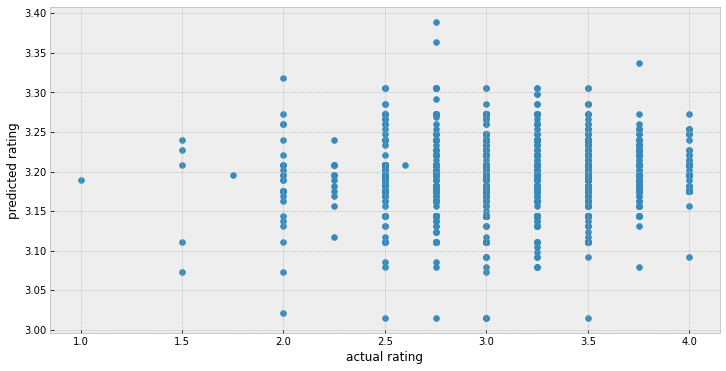

In [7]:
plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(df.rating, reg.predict(df[['cocoa_percent']]))
plt.show()

In [8]:
r2_score(df.rating, reg.predict(df[['cocoa_percent']]))

0.006163510663002136

Primjećujem da su najveće ocjene za otprilike 70% kakaa. Prvo raste, potom pada?

Ajmo razdvojiti podatke na one gdje je postotak čokolade veći i manji od medijana.

In [9]:
lt_70 = df[df.cocoa_percent < 70]
lt_70

Unnamed: 0   ref                        company company_location  \
3              3   797                       A. Morin           France   
6              6  1019                       A. Morin           France   
25            25  1876                       A. Morin           France   
26            26  2206                       A. Morin           France   
35            35   705  Adi aka Fijiana (Easy In Ltd)             Fiji   
...          ...   ...                            ...              ...   
2207        2207   749                         Zotter          Austria   
2208        2208   875                         Zotter          Austria   
2211        2211   801                         Zotter          Austria   
2213        2213   883                         Zotter          Austria   
2215        2215   883                         Zotter          Austria   

      review_date country_of_bean_origin    specific_bean_origin_or_bar_name  \
3            2012                   Peru                                Peru   
6            2013                   Peru                Chanchamayo Province   
25           2016               Sao tome                         Agua Grande   
26           2018                   Peru                              Absolu   
35           2011                   Fiji                          Vanua Levu   
...           ...                    ...                                 ...   
2207         2011                  Congo                               Congo   
2208         2012     Dominican republic  Loma Los Pinos, Yacao region, D.R.   
2211         2012                  Blend                     Amazonas Frucht   
2213         2012                  Blend                       Indianer, Raw   
2215         2012                  Congo                    Kongo, Highlands   

      cocoa_percent  rating  counts_of_ingredients  ...       cocoa_butter  \
3              63.0    3.75                      4  ...  have_cocoa_butter   
6              63.0    4.00                      3  ...  have_cocoa_butter   
25             63.0    3.75                      4  ...  have_cocoa_butter   
26             63.0    3.75                      4  ...  have_cocoa_butter   
35             60.0    2.75                      3  ...  have_cocoa_butter   
...             ...     ...                    ...  ...                ...   
2207           65.0    3.00                      4  ...  have_cocoa_butter   
2208           62.0    3.75                      4  ...  have_cocoa_butter   
2211           65.0    3.50                      4  ...  have_cocoa_butter   
2213           58.0    3.50                      4  ...  have_cocoa_butter   
2215           68.0    3.25                      4  ...  have_cocoa_butter   

              vanilla           lecithin           salt           sugar  \
3     have_not_vanila      have_lecithin  have_not_salt      have_sugar   
6     have_not_vanila  have_not_lecithin  have_not_salt      have_sugar   
25    have_not_vanila      have_lecithin  have_not_salt      have_sugar   
26    have_not_vanila      have_lecithin  have_not_salt      have_sugar   
35    have_not_vanila  have_not_lecithin  have_not_salt      have_sugar   
...               ...                ...            ...             ...   
2207  have_not_vanila  have_not_lecithin      have_salt  have_not_sugar   
2208  have_not_vanila  have_not_lecithin      have_salt  have_not_sugar   
2211  have_not_vanila  have_not_lecithin      have_salt  have_not_sugar   
2213  have_not_vanila  have_not_lecithin      have_salt  have_not_sugar   
2215  have_not_vanila  have_not_lecithin      have_salt  have_not_sugar   

               sweetener_without_sugar first_taste       second_taste  \
3     have_not_sweetener_without_sugar      fruity              melon   
6     have_not_sweetener_without_sugar       sweet              cocoa   
25    have_not_sweetener_without_sugar       sweet         chocolatey   
26    have_not_sweetener_w

Prikažimo podatke o ocjenama, za postotak kakaa manji od 70%!

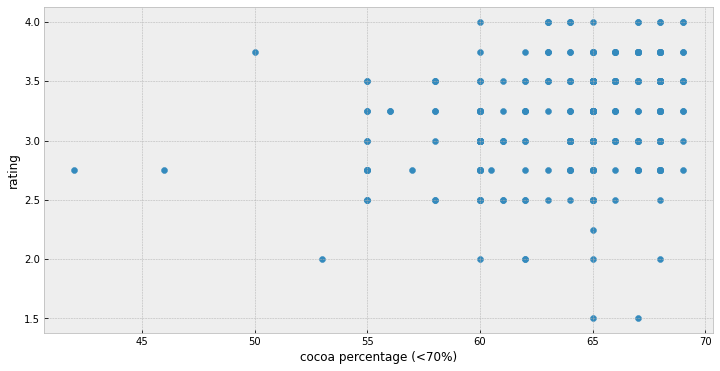

In [10]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (<70%)')
plt.ylabel('rating')
plt.scatter(lt_70.cocoa_percent, lt_70.rating)
plt.show()

In [11]:
reg = lm.LinearRegression()
reg.fit(lt_70[['cocoa_percent']], lt_70.rating)

LinearRegression()

In [12]:
print(reg.coef_)
print(reg.intercept_)

[0.03095997]
1.2080090462966357


Prikažimo podatke i linearni model za predikciju!

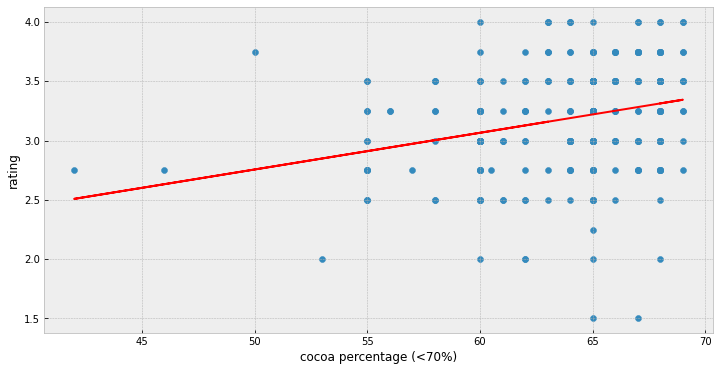

In [13]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (<70%)')
plt.ylabel('rating')
plt.scatter(lt_70.cocoa_percent, lt_70.rating)
plt.plot(lt_70.cocoa_percent, reg.predict(lt_70[['cocoa_percent']]), color = 'red')
plt.show()

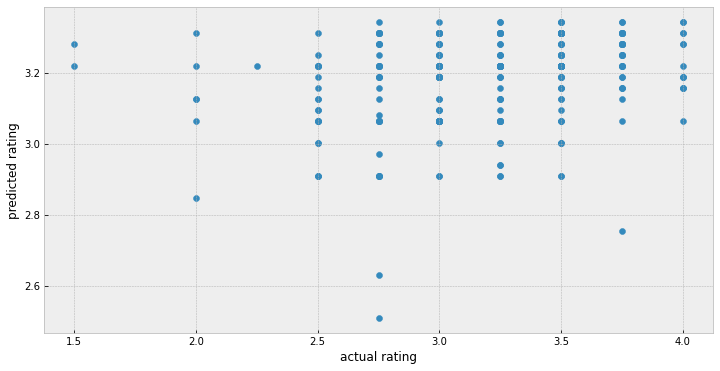

In [14]:
plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(lt_70.rating, reg.predict(lt_70[['cocoa_percent']]))
plt.show()

In [15]:
r2_score(lt_70.rating, reg.predict(lt_70[['cocoa_percent']]))

0.07492653085257006

In [16]:
ge_70 = df[df.cocoa_percent >= 70]
ge_70

Unnamed: 0   ref   company company_location  review_date  \
0              0  2454      5150            U.S.A         2019   
1              1  2458      5150            U.S.A         2019   
2              2  2454      5150            U.S.A         2019   
4              4   797  A. Morin           France         2012   
5              5  1015  A. Morin           France         2013   
...          ...   ...       ...              ...          ...   
2219        2219  1205    Zotter          Austria         2014   
2220        2220  1996    Zotter          Austria         2017   
2221        2221  2170    Zotter          Austria         2018   
2222        2222  2170    Zotter          Austria         2018   
2223        2223  2036    Zotter          Austria         2018   

     country_of_bean_origin specific_bean_origin_or_bar_name  cocoa_percent  \
0                Madagascar           Bejofo Estate, batch 1           76.0   
1        Dominican republic                  Zorzal, batch 1           76.0   
2                  Tanzania            Kokoa Kamili, batch 1           76.0   
4                   Bolivia                          Bolivia           70.0   
5                 Venezuela                            Chuao           70.0   
...                     ...                              ...            ...   
2219                  Blend                              Raw           80.0   
2220               Colombia                 APROCAFA, Acandi           75.0   
2221                 Belize                         Maya Mtn           72.0   
2222                  Congo            Mountains of the Moon           70.0   
2223                  Blend  Dry Aged, 30 yr Anniversary bar           75.0   

      rating  counts_of_ingredients  ...       cocoa_butter          vanilla  \
0       3.75                      3  ...  have_cocoa_butter  have_not_vanila   
1       3.50                      3  ...  have_cocoa_butter  have_not_vanila   
2       3.25                      3  ...  have_cocoa_butter  have_not_vanila   
4       3.50                      4  ...  have_cocoa_butter  have_not_vanila   
5       4.00                      4  ...  have_cocoa_butter  have_not_vanila   
...      ...                    ...  ...                ...              ...   
2219    2.75                      4  ...  have_cocoa_butter  have_not_vanila   
2220    3.75                      3  ...  have_cocoa_butter  have_not_vanila   
2221    3.50                      3  ...  have_cocoa_butter  have_not_vanila   
2222    3.25                      3  ...  have_cocoa_butter  have_not_vanila   
2223    3.00                      3  ...  have_cocoa_butter  have_not_vanila   

               lecithin           salt           sugar  \
0     have_not_lecithin  have_not_salt      have_sugar   
1     have_not_lecithin  have_not_salt      have_sugar   
2     have_not_lecithin  have_not_salt      have_sugar   
4         have_lecithin  have_not_salt      have_sugar   
5         have_lecithin  have_not_salt      have_sugar   
...                 ...            ...             ...   
2219  have_not_lecithin      have_salt  have_not_sugar   
2220  have_not_lecithin  have_not_salt      have_sugar   
2221  have_not_lecithin  have_not_salt      have_sugar   
2222  have_not_lecithin  have_not_salt      have_sugar   
2223  have_not_lecithin  have_not_salt      have_sugar   

               sweetener_without_sugar   first_taste second_taste third_taste  \
0     have_not_sweetener_without_sugar         cocoa   blackberry   full body   
1     have_not_sweetener_without_sugar         cocoa      vegetal      savory   
2     have_not_sweetener_without_sugar    rich cocoa        fatty      bready   
4     have_not_sweetener_without_sugar       vegetal        nutty         NaN   
5     have_not_sweetener_without_sugar          oily          nut     caramel   
...                                ...           ...          ...         ...   
2219      have_sweetener_without_sugar 

Prikažimo podatke o ocjenama, za postotak kakaa veći ili jednak 70%!

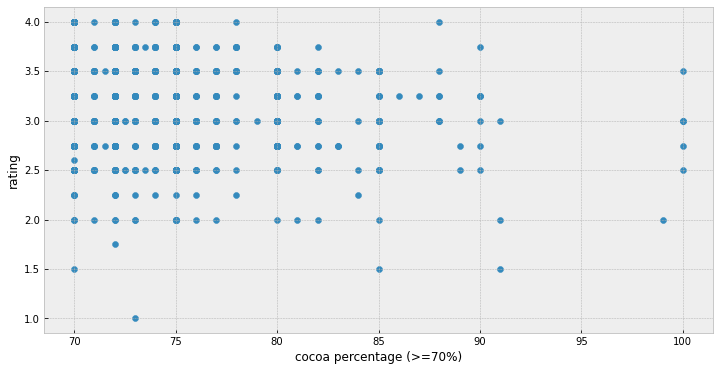

In [17]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (>=70%)')
plt.ylabel('rating')
plt.scatter(ge_70.cocoa_percent, ge_70.rating)
plt.show()

In [18]:
reg = lm.LinearRegression()
reg.fit(ge_70[['cocoa_percent']], ge_70.rating)

LinearRegression()

In [19]:
print(reg.coef_)
print(reg.intercept_)

[-0.01756972]
4.48045834397659


Prikažimo podatke i linearni model za predikciju!

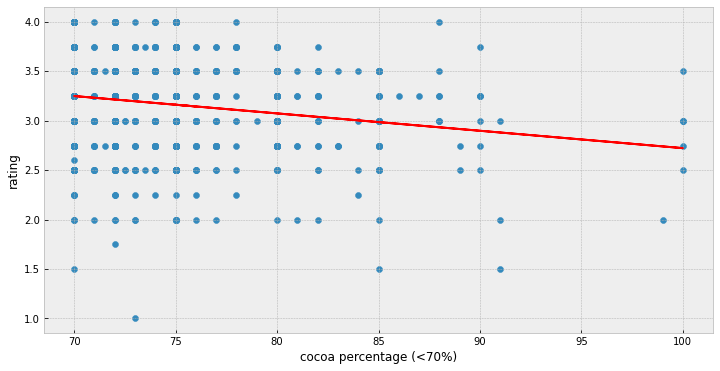

In [20]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (<70%)')
plt.ylabel('rating')
plt.scatter(ge_70.cocoa_percent, ge_70.rating)
plt.plot(ge_70.cocoa_percent, reg.predict(ge_70[['cocoa_percent']]), color = 'red')
plt.show()

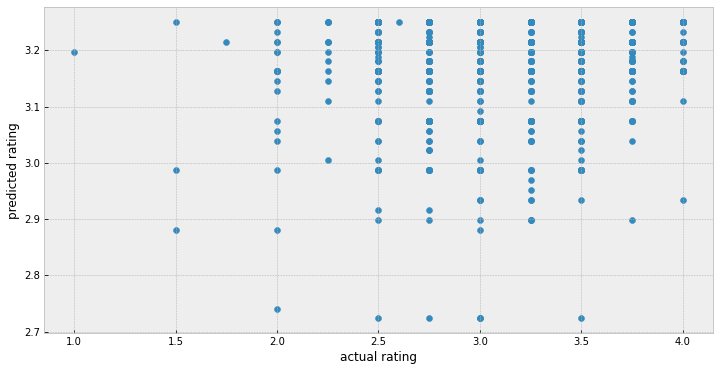

In [21]:
plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(ge_70.rating, reg.predict(ge_70[['cocoa_percent']]))
plt.show()

In [22]:
r2_score(ge_70.rating, reg.predict(ge_70[['cocoa_percent']]))

0.029636981164876564

NEKI NELINEARNI MODEL?

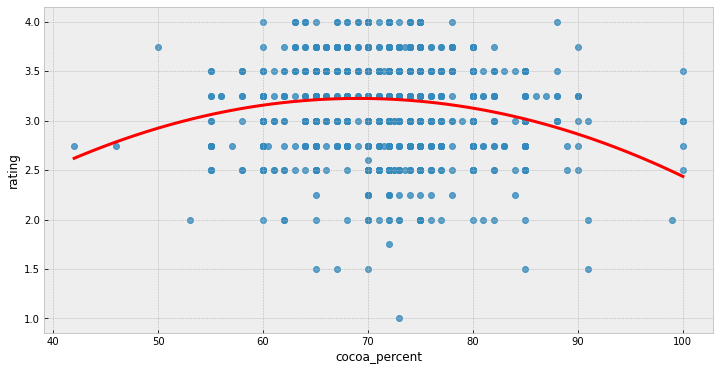

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df.cocoa_percent, y=df.rating, order=2, line_kws={"color": "red"}, ci=None)
plt.show()

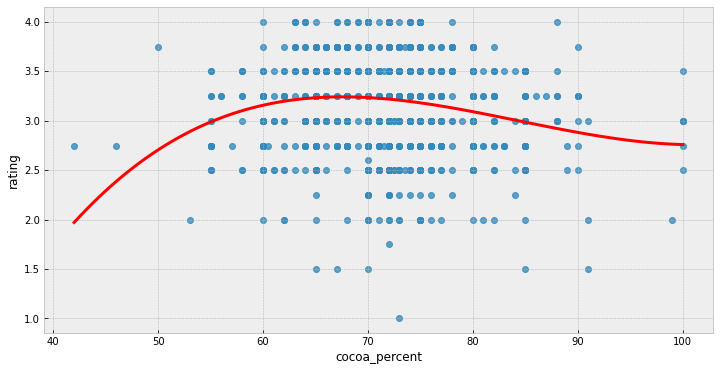

In [24]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df.cocoa_percent, y=df.rating, order=3, line_kws={"color": "red"}, ci=None)
plt.show()

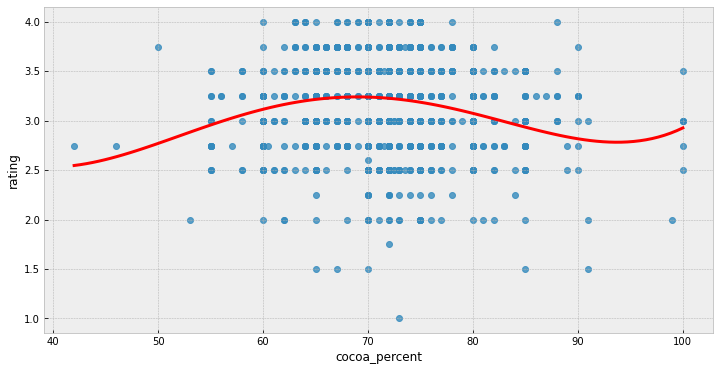

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df.cocoa_percent, y=df.rating, order=4, line_kws={"color": "red"}, ci=None)
plt.show()

Možemo li predvidjeti ocjenu iz broja sastojaka?

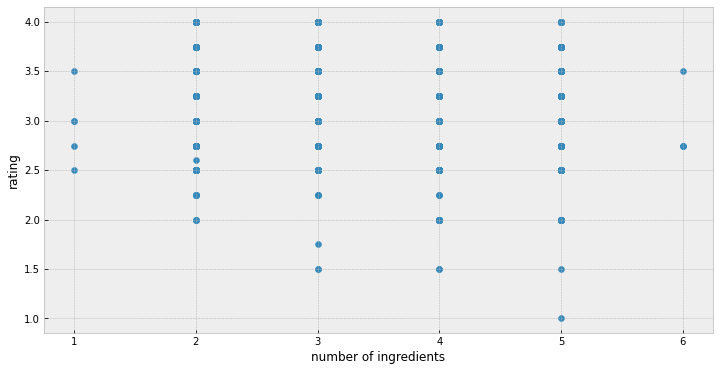

In [26]:
plt.figure(figsize=(12,6))
plt.xlabel('number of ingredients')
plt.ylabel('rating')
plt.scatter(df.counts_of_ingredients, df.rating)
plt.show()

In [27]:
reg = lm.LinearRegression()
reg.fit(df[['counts_of_ingredients']], df.rating)

LinearRegression()

In [28]:
print(reg.coef_)
print(reg.intercept_)

[-0.04430273]
3.3348358631905137


Prikažimo podatke i linearni model za predikciju!

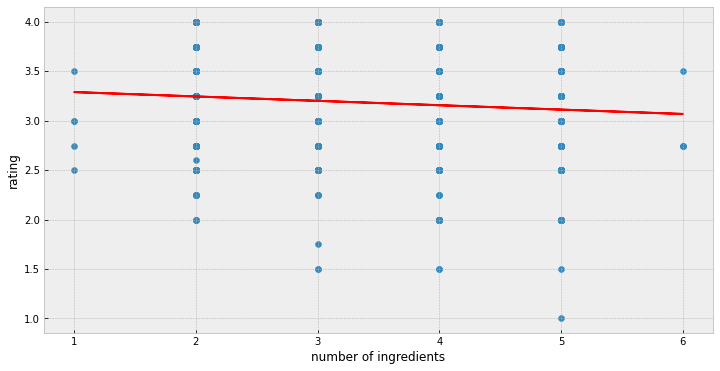

0.008996486196720888

In [31]:
plt.figure(figsize=(12,6))
plt.xlabel('number of ingredients')
plt.ylabel('rating')
plt.scatter(df.counts_of_ingredients, df.rating)
plt.plot(df.counts_of_ingredients, reg.predict(df[['counts_of_ingredients']]), color = 'red')
plt.show()
r2_score(df.rating, reg.predict(df[['counts_of_ingredients']]))

Možemo li predvidjeti ocjenu iz godine ocjenjivanja?

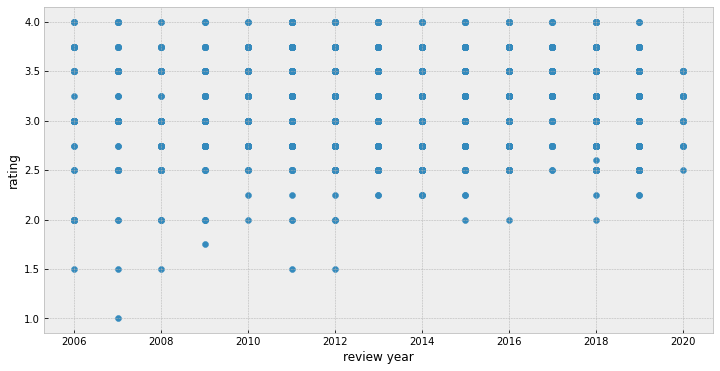

In [32]:
plt.figure(figsize=(12,6))
plt.xlabel('review year')
plt.ylabel('rating')
plt.scatter(df.review_date, df.rating)
plt.show()

In [33]:
reg = lm.LinearRegression()
reg.fit(df[['review_date']], df.rating)

LinearRegression()

In [34]:
print(reg.coef_)
print(reg.intercept_)

[0.00663084]
-10.15500456621695


Nagib je vrlo malen, što ima smisla budući da su ocjene više manje konstantne kroz vrijeme.

Prikažimo podatke i linearni model za predikciju!

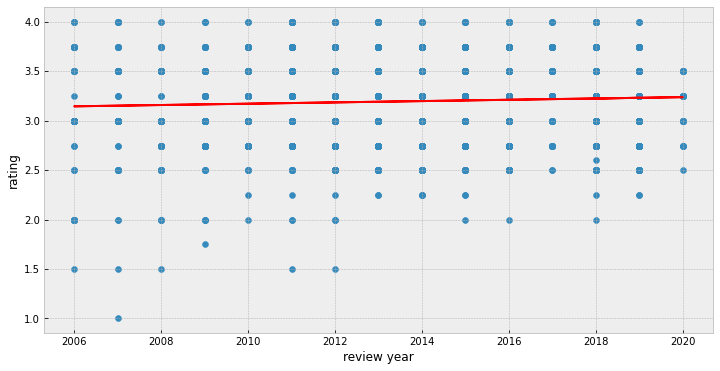

0.0029907972567494445

In [35]:
plt.figure(figsize=(12,6))
plt.xlabel('review year')
plt.ylabel('rating')
plt.scatter(df.review_date, df.rating)
plt.plot(df.review_date, reg.predict(df[['review_date']]), color = 'red')
plt.show()

r2_score(df.rating, reg.predict(df[['review_date']]))

VIŠESTRUKA REGRESIJA

Pokušajmo dodati godinu proizvodnje u naš model

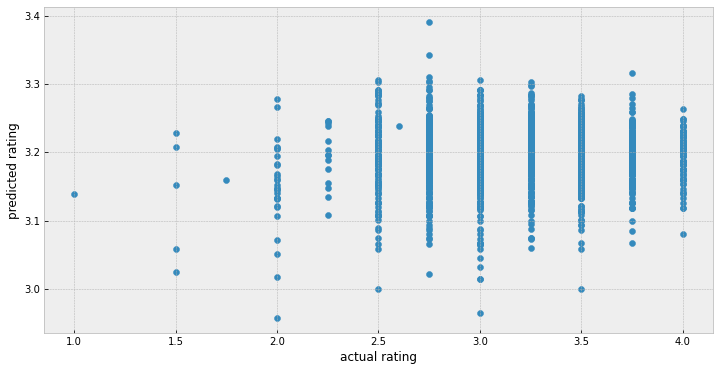

0.00965564935540475

In [36]:
reg = lm.LinearRegression()
reg.fit(df[['cocoa_percent','review_date']], df.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(df.rating, reg.predict(df[['cocoa_percent','review_date']]))
plt.show()

r2_score(df.rating, reg.predict(df[['cocoa_percent','review_date']]))

Dodajmo i broj sastojaka

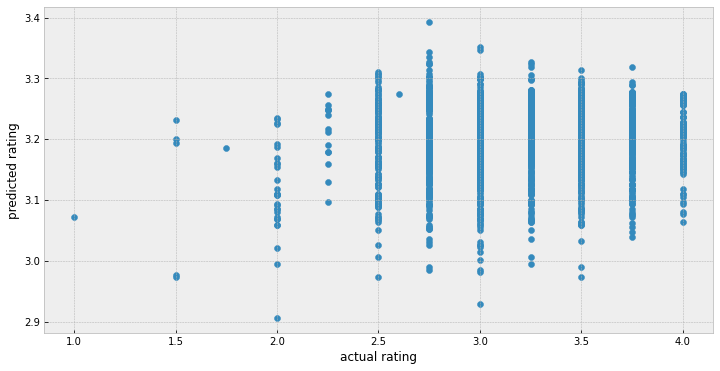

0.01907097250432177

In [37]:
reg = lm.LinearRegression()
reg.fit(df[['cocoa_percent','review_date','counts_of_ingredients']], df.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(df.rating, reg.predict(df[['cocoa_percent','review_date','counts_of_ingredients']]))
plt.show()

r2_score(df.rating, reg.predict(df[['cocoa_percent','review_date','counts_of_ingredients']]))

Kako bismo mogli koristiti pojedine sastojke u modelu, moramo izmijeniti podatke

In [38]:
df['cocoa_butter'].replace({"have_cocoa_butter": 1, "have_not_cocoa_butter": 0}, inplace=True)
df['vanilla'].replace({"have_vanila": 1, "have_not_vanila": 0}, inplace=True)
df['lecithin'].replace({"have_lecithin": 1, "have_not_lecithin": 0}, inplace=True)
df['salt'].replace({"have_salt": 1, "have_not_salt": 0}, inplace=True)
df['sugar'].replace({"have_sugar": 1, "have_not_sugar": 0}, inplace=True)
df['sweetener_without_sugar'].replace({"have_sweetener_without_sugar": 1, "have_not_sweetener_without_sugar": 0}, inplace=True)
df

Unnamed: 0   ref   company company_location  review_date  \
0              0  2454      5150            U.S.A         2019   
1              1  2458      5150            U.S.A         2019   
2              2  2454      5150            U.S.A         2019   
3              3   797  A. Morin           France         2012   
4              4   797  A. Morin           France         2012   
...          ...   ...       ...              ...          ...   
2219        2219  1205    Zotter          Austria         2014   
2220        2220  1996    Zotter          Austria         2017   
2221        2221  2170    Zotter          Austria         2018   
2222        2222  2170    Zotter          Austria         2018   
2223        2223  2036    Zotter          Austria         2018   

     country_of_bean_origin specific_bean_origin_or_bar_name  cocoa_percent  \
0                Madagascar           Bejofo Estate, batch 1           76.0   
1        Dominican republic                  Zorzal, batch 1           76.0   
2                  Tanzania            Kokoa Kamili, batch 1           76.0   
3                      Peru                             Peru           63.0   
4                   Bolivia                          Bolivia           70.0   
...                     ...                              ...            ...   
2219                  Blend                              Raw           80.0   
2220               Colombia                 APROCAFA, Acandi           75.0   
2221                 Belize                         Maya Mtn           72.0   
2222                  Congo            Mountains of the Moon           70.0   
2223                  Blend  Dry Aged, 30 yr Anniversary bar           75.0   

      rating  counts_of_ingredients  ... cocoa_butter  vanilla  lecithin  \
0       3.75                      3  ...            1        0         0   
1       3.50                      3  ...            1        0         0   
2       3.25                      3  ...            1        0         0   
3       3.75                      4  ...            1        0         1   
4       3.50                      4  ...            1        0         1   
...      ...                    ...  ...          ...      ...       ...   
2219    2.75                      4  ...            1        0         0   
2220    3.75                      3  ...            1        0         0   
2221    3.50                      3  ...            1        0         0   
2222    3.25                      3  ...            1        0         0   
2223    3.00                      3  ...            1        0         0   

      salt  sugar  sweetener_without_sugar   first_taste second_taste  \
0        0      1                        0         cocoa   blackberry   
1        0      1                        0         cocoa      vegetal   
2        0      1                        0    rich cocoa        fatty   
3        0      1                        0        fruity        melon   
4        0      1                        0       vegetal        nutty   
...    ...    ...                      ...           ...          ...   
2219     1      0                        1          waxy      cloying   
2220     0      1                        0  strong nutty  marshmallow   
2221     0      1                        0         muted       roasty   
2222     0      1                        0         fatty    mild nuts   
2223     0      1                        0         fatty       earthy   

     third_taste fourth_taste  
0      full body          NaN  
1         savory          NaN  
2         bready          NaN  
3         roasty          NaN  
4            NaN          NaN  
...          ...          ...  
2219     vegetal          NaN  
2220         NaN          NaN  
2221  accessible          NaN  
2222  mild fruit          NaN  
2223       cocoa          NaN  

[2224 rows x 21 columns]

Model koji sadrži samo sastojke

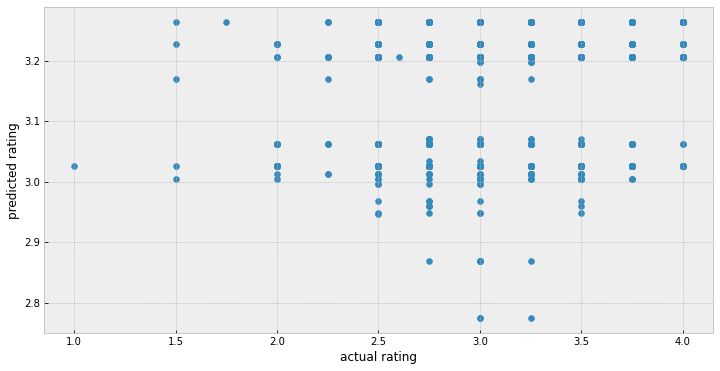

0.040058635269200726

In [39]:
reg = lm.LinearRegression()
reg.fit(df[['cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']], df.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(df.rating, reg.predict(df[['cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))
plt.show()

r2_score(df.rating, reg.predict(df[['cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))

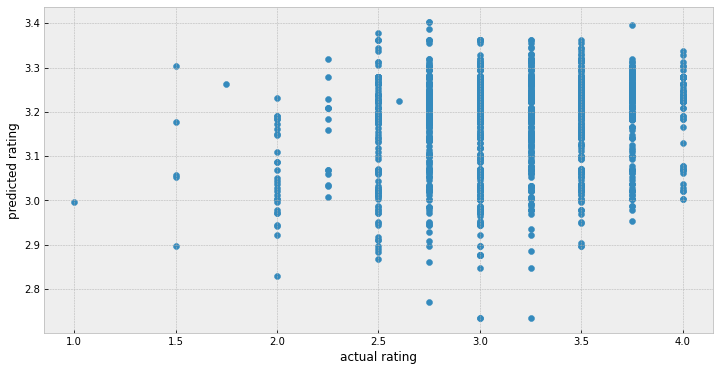

0.0490538038490812

In [40]:
reg = lm.LinearRegression()
reg.fit(df[['cocoa_percent','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']], df.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(df.rating, reg.predict(df[['cocoa_percent','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))
plt.show()

r2_score(df.rating, reg.predict(df[['cocoa_percent','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))

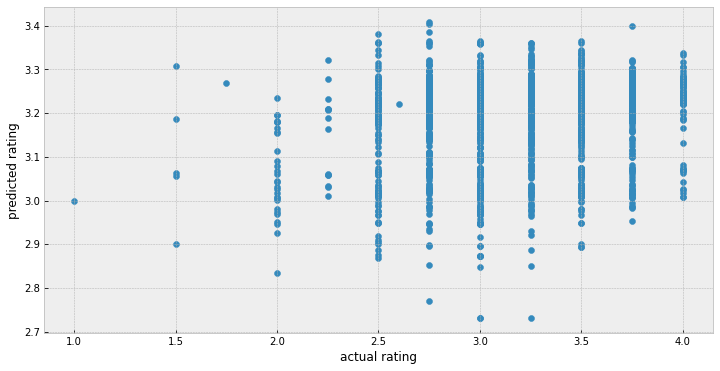

0.04914391930232387

In [41]:
reg = lm.LinearRegression()
reg.fit(df[['cocoa_percent','review_date','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']], df.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(df.rating, reg.predict(df[['cocoa_percent','review_date','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))
plt.show()

r2_score(df.rating, reg.predict(df[['cocoa_percent','review_date','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))

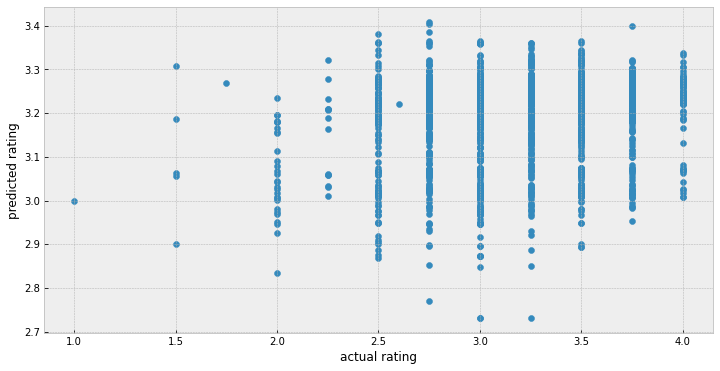

0.04914391930232387

In [42]:
reg = lm.LinearRegression()
reg.fit(df[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']], df.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(df.rating, reg.predict(df[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))
plt.show()

r2_score(df.rating, reg.predict(df[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))

In [43]:
model = ols('rating ~ cocoa_percent + review_date + counts_of_ingredients + cocoa_butter + vanilla + lecithin + salt + sugar + sweetener_without_sugar', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     14.31
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.65e-20
Time:                        22:56:21   Log-Likelihood:                -1244.5
No. Observations:                2224   AIC:                             2507.
Df Residuals:                    2215   BIC:                             2558.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.5893      4.883      1.145      0.252      -3.987      15.165
cocoa_percent              -0.0083      0.002     -4.581      0.000      -0.012      -0.005
review_date                -0.0013      0.003     -0.458      0.647      -0.007       0.004
counts_of_ingredients       0.7386      0.696      1.061      0.289      -0.626       2.103
cocoa_butter               -0.6845      0.697     -0.982      0.326      -2.052       0.683
vanilla                    -0.9533      0.706     -1.351      0.177      -2.337       0.430
lecithin                   -0.7881      0.700     -1.126      0.260      -2.160       0.584
salt                       -0.8161      0.703     -1.160      0.246      -2.195       0.563
sugar                      -0.7095      0.711     -0.998      0.318      -2.104       0.685
sweetener_without_sugar    -0.8993      0.710     -1.266      0.206      -2.292       0.494
==============================================================================
Omnibus:                       36.108   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.453
Skew:                          -0.313   Prob(JB):                     7.37e-09
Kurtosis:                       3.113   Cond. No.                     8.66e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R^2 je i dalje jako mali. Probajmo višestruku regresiju na podijeljenim podacima.

In [166]:
lt_70 = df[df.cocoa_percent < 70]

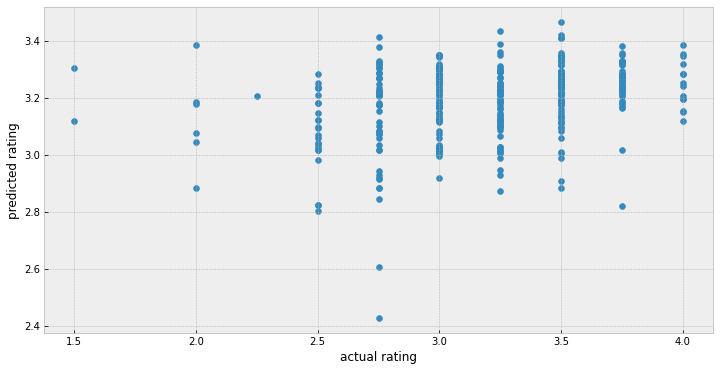

0.08966103713158102

In [167]:
reg = lm.LinearRegression()
reg.fit(lt_70[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']], lt_70.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(lt_70.rating, reg.predict(lt_70[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))
plt.show()

r2_score(lt_70.rating, reg.predict(lt_70[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))

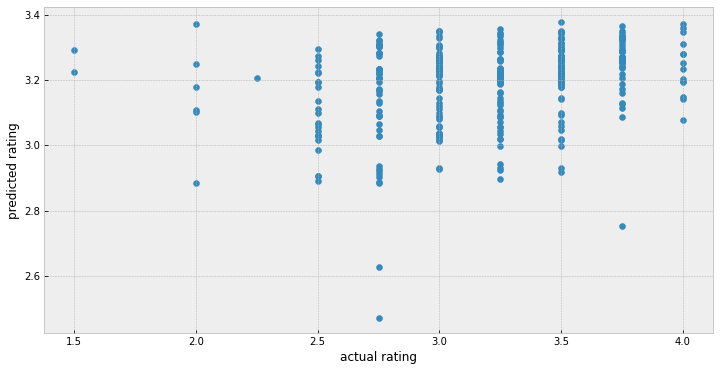

0.07911267499438945

In [168]:
reg = lm.LinearRegression()
reg.fit(lt_70[['cocoa_percent','review_date','counts_of_ingredients']], lt_70.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(lt_70.rating, reg.predict(lt_70[['cocoa_percent','review_date','counts_of_ingredients']]))
plt.show()

r2_score(lt_70.rating, reg.predict(lt_70[['cocoa_percent','review_date','counts_of_ingredients']]))

In [169]:
ge_70 = df[df.cocoa_percent >= 70]

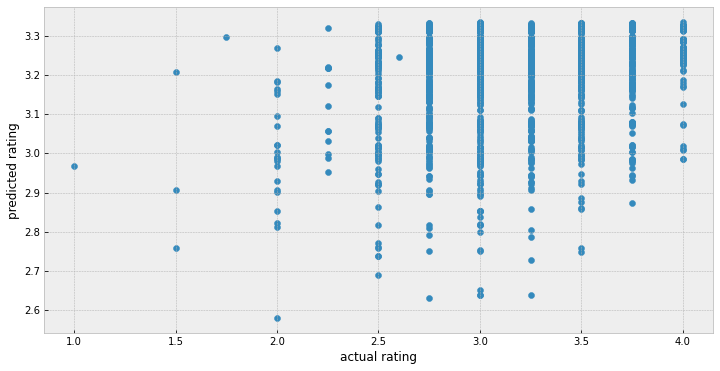

0.08192125635565939

In [170]:
reg = lm.LinearRegression()
reg.fit(ge_70[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']], ge_70.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(ge_70.rating, reg.predict(ge_70[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))
plt.show()

r2_score(ge_70.rating, reg.predict(ge_70[['cocoa_percent','review_date','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']]))

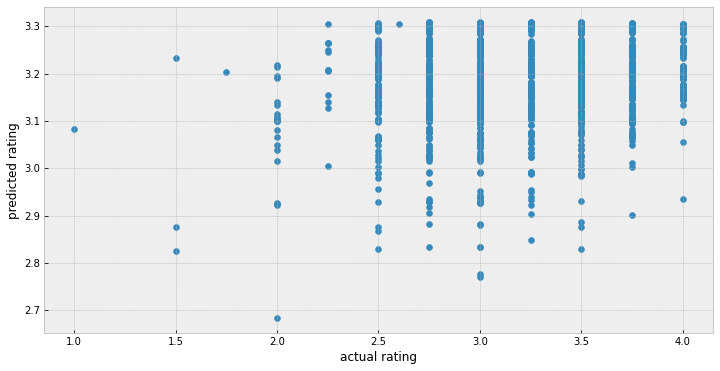

0.041153119988152076

In [171]:
reg = lm.LinearRegression()
reg.fit(ge_70[['cocoa_percent','review_date','counts_of_ingredients']], ge_70.rating)

plt.figure(figsize=(12,6))
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.scatter(ge_70.rating, reg.predict(ge_70[['cocoa_percent','review_date','counts_of_ingredients']]))
plt.show()

r2_score(ge_70.rating, reg.predict(ge_70[['cocoa_percent','review_date','counts_of_ingredients']]))

Inkorporacija kategoričkih podataka

In [46]:
model = ols('rating ~ cocoa_percent + C(company) + cocoa_butter + vanilla + lecithin + sugar + salt + sweetener_without_sugar', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     2.593
Date:                Mon, 23 May 2022   Prob (F-statistic):           4.15e-47
Time:                        22:57:57   Log-Likelihood:                -666.72
No. Observations:                2224   AIC:                             2351.
Df Residuals:                    1715   BIC:                             5256.
Df Model:                         508                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 4.0966      0.341     11.999      0.000       3.427       4.766
C(company)[T.A. Morin]                                   -0.1707      0.235     -0.725      0.468      -0.632       0.291
C(company)[T.AMMA]                                       -0.0704      0.279     -0.252      0.801      -0.617       0.477
C(company)[T.Acalli]                                     -0.0413      0.287     -0.144      0.886      -0.605       0.522
C(company)[T.Adi aka Fijiana (Easy In Ltd)]              -0.2580      0.284     -0.908      0.364      -0.815       0.299
C(company)[T.Aelan]                                      -0.8618      0.288     -2.997      0.003      -1.426      -0.298
C(company)[T.Aequare (Gianduja)]                         -0.6227      0.348     -1.788      0.074      -1.306       0.060
C(company)[T.Ah Cacao]                                   -0.5477      0.430     -1.275      0.202      -1.390       0.295
C(company)[T.Akesson's (Pralus)]                         -0.4393      0.310     -1.417      0.157      -1.047       0.169
C(company)[T.Alain Ducasse]                              -0.4481      0.296     -1.516      0.130      -1.028       0.132
C(company)[T.Alexandre]                                  -0.0477      0.284     -0.168      0.867      -0.605       0.510
C(company)[T.Altus aka Cao Artisan]                      -0.7486      0.245     -3.052      0.002      -1.230      -0.268
C(company)[T.Amano]                                      -0.0214      0.259     -0.083      0.934      -0.529       0.486
C(company)[T.Amatller (Simon Coll)]                      -0.6771      0.287     -2.358      0.018      -1.240      -0.114
C(company)[T.Amazona]                                    -0.1528      0.340     -0.450      0.653      -0.819       0.513
C(company)[T.Ambrosia]                                   -0.3721      0.266     -1.397      0.163      -0.895       0.150
C(company)[T.Amedei]                                     -0.1425      0.248     -0.575      0.565      -0.629       0.344
C(company)[T.Anahata]                                    -0.5720      0.432     -1.326      0.185      -1.418       0.274
C(company)[T.Animas]                                     -0.0720      0.432     -0.167      0.867      -0.918       0.774
C(company)[T.Ara]                                        -0.7014      0.284     -2.469      0.014      -1.259      -0.144
C(company)[T.Arete]                                      -0.0563      0.227     -0.248      0.804      -0.501       0.389
C(company)[T.Argencove]                                  -0.2993      0.288     -1.041      0.298      -0.863       0.265
C(company)[T.Artisan du Chocolat]

In [48]:
model = ols('rating ~ cocoa_percent + C(company) + counts_of_ingredients', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     2.579
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.63e-46
Time:                        22:58:49   Log-Likelihood:                -675.61
No. Observations:                2224   AIC:                             2359.
Df Residuals:                    1720   BIC:                             5236.
Df Model:                         503                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 4.2935      0.278     15.445      0.000       3.748       4.839
C(company)[T.A. Morin]                                   -0.1042      0.229     -0.454      0.650      -0.554       0.346
C(company)[T.AMMA]                                       -0.0009      0.274     -0.003      0.997      -0.538       0.536
C(company)[T.Acalli]                                     -0.0351      0.286     -0.123      0.902      -0.597       0.526
C(company)[T.Adi aka Fijiana (Easy In Ltd)]              -0.2582      0.285     -0.907      0.365      -0.817       0.300
C(company)[T.Aelan]                                      -0.8558      0.286     -2.988      0.003      -1.417      -0.294
C(company)[T.Aequare (Gianduja)]                         -0.6793      0.342     -1.986      0.047      -1.350      -0.008
C(company)[T.Ah Cacao]                                   -0.5492      0.431     -1.275      0.202      -1.394       0.295
C(company)[T.Akesson's (Pralus)]                         -0.3683      0.306     -1.205      0.228      -0.968       0.231
C(company)[T.Alain Ducasse]                              -0.5566      0.271     -2.056      0.040      -1.088      -0.026
C(company)[T.Alexandre]                                  -0.0492      0.285     -0.173      0.863      -0.608       0.510
C(company)[T.Altus aka Cao Artisan]                      -0.7196      0.244     -2.946      0.003      -1.199      -0.240
C(company)[T.Amano]                                      -0.0760      0.250     -0.304      0.761      -0.566       0.414
C(company)[T.Amatller (Simon Coll)]                      -0.6692      0.286     -2.340      0.019      -1.230      -0.108
C(company)[T.Amazona]                                    -0.1537      0.340     -0.452      0.652      -0.821       0.514
C(company)[T.Ambrosia]                                   -0.3561      0.265     -1.345      0.179      -0.876       0.163
C(company)[T.Amedei]                                     -0.1931      0.240     -0.804      0.421      -0.664       0.278
C(company)[T.Anahata]                                    -0.5648      0.431     -1.309      0.191      -1.411       0.281
C(company)[T.Animas]                                     -0.0648      0.431     -0.150      0.881      -0.911       0.781
C(company)[T.Ara]                                        -0.7019      0.285     -2.465      0.014      -1.260      -0.143
C(company)[T.Arete]                                      -0.0525      0.226     -0.232      0.816      -0.496       0.391
C(company)[T.Argencove]                                  -0.2933      0.286     -1.024      0.306      -0.855       0.268
C(company)[T.Artisan du Chocolat]

I R^2 i adjusted R^2 su veći dok koristimo sve sastojke, a ne samo broj sastojaka

In [49]:
model = ols('rating ~ cocoa_percent + C(company) + C(country_of_bean_origin)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     2.486
Date:                Mon, 23 May 2022   Prob (F-statistic):           5.51e-45
Time:                        23:00:25   Log-Likelihood:                -626.67
No. Observations:                2224   AIC:                             2371.
Df Residuals:                    1665   BIC:                             5562.
Df Model:                         558                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 4.2854      0.461      9.294      0.000       3.381       5.190
C(company)[T.A. Morin]                                   -0.0129      0.231     -0.056      0.955      -0.466       0.440
C(company)[T.AMMA]                                        0.0398      0.279      0.143      0.886      -0.507       0.586
C(company)[T.Acalli]                                      0.1077      0.286      0.377      0.707      -0.453       0.668
C(company)[T.Adi aka Fijiana (Easy In Ltd)]              -0.0162      0.313     -0.052      0.959      -0.631       0.599
C(company)[T.Aelan]                                      -0.5596      0.319     -1.753      0.080      -1.186       0.066
C(company)[T.Aequare (Gianduja)]                         -0.7099      0.342     -2.074      0.038      -1.381      -0.039
C(company)[T.Ah Cacao]                                   -0.4437      0.435     -1.020      0.308      -1.297       0.409
C(company)[T.Akesson's (Pralus)]                         -0.3187      0.306     -1.042      0.297      -0.918       0.281
C(company)[T.Alain Ducasse]                              -0.6150      0.264     -2.330      0.020      -1.133      -0.097
C(company)[T.Alexandre]                                  -0.0099      0.285     -0.035      0.972      -0.569       0.549
C(company)[T.Altus aka Cao Artisan]                      -0.6581      0.245     -2.691      0.007      -1.138      -0.178
C(company)[T.Amano]                                      -0.0484      0.249     -0.194      0.846      -0.537       0.440
C(company)[T.Amatller (Simon Coll)]                      -0.6121      0.287     -2.132      0.033      -1.175      -0.049
C(company)[T.Amazona]                                    -0.0744      0.341     -0.218      0.827      -0.743       0.594
C(company)[T.Ambrosia]                                   -0.2768      0.264     -1.049      0.294      -0.794       0.241
C(company)[T.Amedei]                                     -0.1159      0.240     -0.483      0.629      -0.586       0.354
C(company)[T.Anahata]                                    -0.5110      0.429     -1.191      0.234      -1.353       0.331
C(company)[T.Animas]                                      0.1462      0.432      0.339      0.735      -0.701       0.993
C(company)[T.Ara]                                        -0.6383      0.285     -2.241      0.025      -1.197      -0.080
C(company)[T.Arete]                                       0.0509      0.226      0.225      0.822      -0.392       0.494
C(company)[T.Argencove]                                  -0.1383      0.290     -0.476      0.634      -0.708       0.431
C(company)[T.Artisan du Chocolat]

In [52]:
model = ols('rating ~ cocoa_percent + C(country_of_bean_origin)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.418
Date:                Mon, 23 May 2022   Prob (F-statistic):             0.0186
Time:                        23:02:06   Log-Likelihood:                -1256.2
No. Observations:                2224   AIC:                             2638.
Df Residuals:                    2161   BIC:                             2998.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              3.7750      0.278     13.584      0.000       3.230       4.320
C(country_of_bean_origin)[T.Belize]                    0.0185      0.255      0.073      0.942      -0.482       0.519
C(country_of_bean_origin)[T.Blend]                    -0.1537      0.252     -0.610      0.542      -0.648       0.340
C(country_of_bean_origin)[T.Bolivia]                  -0.0502      0.255     -0.197      0.844      -0.549       0.449
C(country_of_bean_origin)[T.Bolvia]                    0.0076      0.499      0.015      0.988      -0.970       0.985
C(country_of_bean_origin)[T.Brazil]                    0.0185      0.254      0.073      0.942      -0.480       0.517
C(country_of_bean_origin)[T.Burma]                    -0.2424      0.499     -0.486      0.627      -1.220       0.735
C(country_of_bean_origin)[T.Cameroon]                 -0.1641      0.353     -0.466      0.642      -0.856       0.527
C(country_of_bean_origin)[T.Colombia]                 -0.0196      0.255     -0.077      0.939      -0.520       0.480
C(country_of_bean_origin)[T.Congo]                     0.0792      0.281      0.282      0.778      -0.472       0.631
C(country_of_bean_origin)[T.Costa rica]               -0.0749      0.258     -0.290      0.772      -0.581       0.431
C(country_of_bean_origin)[T.Cuba]                      0.0822      0.279      0.295      0.768      -0.465       0.629
C(country_of_bean_origin)[T.Dominican republic]       -0.0252      0.251     -0.100      0.920      -0.518       0.467
C(country_of_bean_origin)[T.Dr congo]                 -0.2576      0.499     -0.517      0.605      -1.235       0.720
C(country_of_bean_origin)[T.Ecuador]                  -0.0118      0.251     -0.047      0.962      -0.505       0.481
C(country_of_bean_origin)[T.El salvador]              -0.2297      0.305     -0.752      0.452      -0.829       0.369
C(country_of_bean_origin)[T.Fiji]                     -0.1539      0.273     -0.563      0.573      -0.690       0.382
C(country_of_bean_origin)[T.Gabon]                     0.0457      0.499      0.092      0.927      -0.932       1.024
C(country_of_bean_origin)[T.Ghana]                    -0.0731      0.261     -0.280      0.779      -0.584       0.438
C(country_of_bean_origin)[T.Grenada]                  -0.2268      0.270     -0.839      0.402      -0.757       0.304
C(country_of_bean_origin)[T.Guatemala]                 0.0427      0.256      0.167      0.868      -0.460       0.545
C(country_of_bean_origin)[T.Haiti]                     0.0354      0.264      0.134      0.893      -0.483       0.554
C(country_of_bean_origin)[T.Honduras]                  0.0067      0.265      0.025      0.980      -0.513  

In [51]:
model = ols('rating ~ cocoa_percent + C(company_location)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.943
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.12e-05
Time:                        23:01:37   Log-Likelihood:                -1236.3
No. Observations:                2224   AIC:                             2607.
Df Residuals:                    2157   BIC:                             2989.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        3.9869      0.248     16.106      0.000       3.501       4.472
C(company_location)[T.Australia]                -0.1310      0.222     -0.589      0.556      -0.567       0.305
C(company_location)[T.Austria]                  -0.2268      0.228     -0.995      0.320      -0.674       0.220
C(company_location)[T.Belgium]                  -0.2983      0.222     -1.345      0.179      -0.733       0.136
C(company_location)[T.Bolivia]                  -0.2291      0.371     -0.618      0.537      -0.957       0.498
C(company_location)[T.Brazil]                   -0.2255      0.232     -0.972      0.331      -0.681       0.230
C(company_location)[T.Canada]                   -0.1795      0.217     -0.828      0.408      -0.605       0.246
C(company_location)[T.Chile]                     0.2500      0.371      0.674      0.500      -0.478       0.978
C(company_location)[T.Colombia]                 -0.3395      0.231     -1.467      0.143      -0.793       0.114
C(company_location)[T.Costa rica]               -0.3472      0.257     -1.349      0.178      -0.852       0.158
C(company_location)[T.Czech republic]           -0.5046      0.327     -1.542      0.123      -1.146       0.137
C(company_location)[T.Denmark]                  -0.1613      0.228     -0.709      0.479      -0.608       0.285
C(company_location)[T.Dominican republic]       -0.3808      0.250     -1.522      0.128      -0.871       0.110
C(company_location)[T.Ecuador]                  -0.4303      0.223     -1.933      0.053      -0.867       0.006
C(company_location)[T.El salvador]              -0.5000      0.327     -1.528      0.127      -1.142       0.142
C(company_location)[T.Fiji]                     -0.2152      0.303     -0.710      0.478      -0.809       0.379
C(company_location)[T.Finland]                  -0.2465      0.371     -0.665      0.506      -0.974       0.481
C(company_location)[T.France]                   -0.2268      0.217     -1.046      0.296      -0.652       0.198
C(company_location)[T.Germany]                  -0.2229      0.225     -0.991      0.322      -0.664       0.218
C(company_location)[T.Ghana]                    -0.6804      0.479     -1.420      0.156      -1.620       0.259
C(company_location)[T.Grenada]                  -0.6597      0.327     -2.016      0.044      -1.301      -0.018
C(company_location)[T.Guatemala]                -0.1486      0.253     -0.586      0.558      -0.646       0.348
C(company_location)[T.Honduras]                 -0.2569      0.277     -0.929      0.353      -0.799       0.286
C(company_location)[T.Hungary]                  -0.2841      0.231     -1.232      0.218      -0.737       0.168
C(company_location)[T.Iceland]  

In [53]:
model = ols('rating ~ C(company)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2.520
Date:                Mon, 23 May 2022   Prob (F-statistic):           5.47e-44
Time:                        23:02:30   Log-Likelihood:                -688.89
No. Observations:                2224   AIC:                             2382.
Df Residuals:                    1722   BIC:                             5247.
Df Model:                         501                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 3.5000      0.216     16.173      0.000       3.076       3.924
C(company)[T.A. Morin]                                   -0.1000      0.229     -0.437      0.662      -0.549       0.349
C(company)[T.AMMA]                                    -5.329e-14      0.274  -1.95e-13      1.000      -0.537       0.537
C(company)[T.Acalli]                                      0.0625      0.286      0.218      0.827      -0.499       0.624
C(company)[T.Adi aka Fijiana (Easy In Ltd)]              -0.2500      0.286     -0.873      0.383      -0.812       0.312
C(company)[T.Aelan]                                      -0.7500      0.286     -2.620      0.009      -1.312      -0.188
C(company)[T.Aequare (Gianduja)]                         -0.6250      0.342     -1.827      0.068      -1.296       0.046
C(company)[T.Ah Cacao]                                   -0.5000      0.433     -1.155      0.248      -1.349       0.349
C(company)[T.Akesson's (Pralus)]                         -0.4167      0.306     -1.361      0.174      -1.017       0.184
C(company)[T.Alain Ducasse]                              -0.6667      0.265     -2.515      0.012      -1.187      -0.147
C(company)[T.Alexandre]                               -4.885e-15      0.286  -1.71e-14      1.000      -0.562       0.562
C(company)[T.Altus aka Cao Artisan]                      -0.6364      0.244     -2.607      0.009      -1.115      -0.158
C(company)[T.Amano]                                      -0.0833      0.250     -0.333      0.739      -0.573       0.407
C(company)[T.Amatller (Simon Coll)]                      -0.6250      0.286     -2.183      0.029      -1.187      -0.063
C(company)[T.Amazona]                                    -0.1250      0.342     -0.365      0.715      -0.796       0.546
C(company)[T.Ambrosia]                                   -0.2500      0.265     -0.943      0.346      -0.770       0.270
C(company)[T.Amedei]                                     -0.1923      0.240     -0.801      0.423      -0.663       0.279
C(company)[T.Anahata]                                    -0.5000      0.433     -1.155      0.248      -1.349       0.349
C(company)[T.Animas]                                  -8.571e-14      0.433  -1.98e-13      1.000      -0.849       0.849
C(company)[T.Ara]                                        -0.6875      0.286     -2.401      0.016      -1.249      -0.126
C(company)[T.Arete]                                       0.0313      0.226      0.138      0.890      -0.413       0.475
C(company)[T.Argencove]                                  -0.1875      0.286     -0.655      0.513      -0.749       0.374
C(company)[T.Artisan du Chocolat]

In [4]:
model = ols('rating ~ C(specific_bean_origin_or_bar_name)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1.224
Date:                Tue, 24 May 2022   Prob (F-statistic):           0.000642
Time:                        11:17:23   Log-Likelihood:                -53.164
No. Observations:                2224   AIC:                             2902.
Df Residuals:                     826   BIC:                         1.088e+04
Df Model:                        1397                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   3.0000      0.407      7.377      0.000       2.202       3.798
C(specific_bean_origin_or_bar_name)[T."heirloom", Arriba Nacional]                          0.5000      0.498      1.004      0.316      -0.478       1.478
C(specific_bean_origin_or_bar_name)[T.2009 Hapa Nibby, Dominican Rep., Bali]                0.7500      0.575      1.304      0.193      -0.379       1.879
C(specific_bean_origin_or_bar_name)[T.A case of the Xerces Blues, triple roast]             0.5000      0.575      0.869      0.385      -0.629       1.629
C(specific_bean_origin_or_bar_name)[T.ABOCFA Coop]                                          1.0000      0.575      1.739      0.082      -0.129       2.129
C(specific_bean_origin_or_bar_name)[T.APROCAFA, Acandi]                                     0.7500      0.575      1.304      0.193      -0.379       1.879
C(specific_bean_origin_or_bar_name)[T.Abinao, West Africa]                                 -0.5000      0.575     -0.869      0.385      -1.629       0.629
C(specific_bean_origin_or_bar_name)[T.Absolu]                                               0.7500      0.575      1.304      0.193      -0.379       1.879
C(specific_bean_origin_or_bar_name)[T.Abstract S. w/ Jamaica nibs,batch abs60323.0]         0.7500      0.575      1.304      0.193      -0.379       1.879
C(specific_bean_origin_or_bar_name)[T.Acarigua, w/ nibs]                                    0.2500      0.575      0.435      0.664      -0.879       1.379
C(specific_bean_origin_or_bar_name)[T.Acopagro]                                         -6.464e-13      0.575  -1.12e-12      1.000      -1.129       1.129
C(specific_bean_origin_or_bar_name)[T.Acul du Nard]                                        -0.2500      0.575     -0.435      0.664      -1.379       0.879
C(specific_bean_origin_or_bar_name)[T.Acul-du-Nord, 2015]                                   0.5000      0.575      0.869      0.385      -0.629       1.629
C(specific_bean_origin_or_bar_name)[T.Africa]                                              -0.2500      0.498     -0.502      0.616      -1.228       0.728
C(specific_bean_origin_or_bar_name)[T.Africa meets Latina]                              -6.325e-13      0.575   -1.1e-12      1.000      -1.129       1.129
C(specific_bean_origin_or_bar_name)[T.Africa, West Africa]                              -6.592e-13      0.575  -1.15e-12      1.000      -1.129       1.129
C(specific_bean_origin_or_bar_name)[T.AgroCriso Plantation]                                 0.0833      0.470      0.17

Kako okusi predviđaju?

In [54]:
model = ols('rating ~ C(first_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2.716
Date:                Mon, 23 May 2022   Prob (F-statistic):           5.98e-49
Time:                        23:04:42   Log-Likelihood:                -711.11
No. Observations:                2224   AIC:                             2334.
Df Residuals:                    1768   BIC:                             4937.
Df Model:                         455                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            2.7500      0.374      7.360      0.000       2.017       3.483
C(first_taste)[T.Fruity]                             0.7500      0.528      1.419      0.156      -0.286       1.786
C(first_taste)[T.XL nibs]                         6.128e-14      0.528   1.16e-13      1.000      -1.036       1.036
C(first_taste)[T.accesible]                          0.7500      0.528      1.419      0.156      -0.286       1.786
C(first_taste)[T.accessible]                         0.2500      0.528      0.473      0.636      -0.786       1.286
C(first_taste)[T.acidic]                             0.1250      0.396      0.315      0.752      -0.652       0.902
C(first_taste)[T.alluring aroma]                     0.7500      0.528      1.419      0.156      -0.286       1.786
C(first_taste)[T.aluminum]                           0.2500      0.528      0.473      0.636      -0.786       1.286
C(first_taste)[T.anise]                              0.2500      0.528      0.473      0.636      -0.786       1.286
C(first_taste)[T.appealing smoke]                    1.0000      0.528      1.892      0.059      -0.036       2.036
C(first_taste)[T.apple]                              1.0000      0.528      1.892      0.059      -0.036       2.036
C(first_taste)[T.ashey]                          -5.659e-15      0.528  -1.07e-14      1.000      -1.036       1.036
C(first_taste)[T.assertive]                          0.7500      0.528      1.419      0.156      -0.286       1.786
C(first_taste)[T.astringent]                         0.5000      0.409      1.222      0.222      -0.303       1.303
C(first_taste)[T.baked]                              0.2500      0.528      0.473      0.636      -0.786       1.286
C(first_taste)[T.baked bread]                        0.7500      0.528      1.419      0.156      -0.286       1.786
C(first_taste)[T.balanced]                           0.9286      0.399      2.325      0.020       0.145       1.712
C(first_taste)[T.banana]                             0.7000      0.392      1.786      0.074      -0.069       1.469
C(first_taste)[T.banana nut]                       1.39e-13      0.528   2.63e-13      1.000      -1.036       1.036
C(first_taste)[T.base cocoa]                         0.5000      0.431      1.159      0.247      -0.346       1.346
C(first_taste)[T.base cocoa w/ palm notes]           0.7500      0.528      1.419      0.156      -0.286       1.786
C(first_taste)[T.basic]                              0.5000      0.458      1.093      0.275      -0.398       1.398
C(first_taste)[T.basic chocolate]                    0.7500      0.528      1.419      0.156      -0.286       1.786
C(first_taste)[T.basic cocoa]            

In [55]:
model = ols('rating ~ C(second_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     2.772
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.48e-51
Time:                        23:05:22   Log-Likelihood:                -623.98
No. Observations:                2147   AIC:                             2206.
Df Residuals:                    1668   BIC:                             4923.
Df Model:                         478                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        3.2500      0.367      8.853      0.000       2.530       3.970
C(second_taste)[T.Cadbury egg]                   0.5000      0.519      0.963      0.336      -0.518       1.518
C(second_taste)[T.Roasty]                        0.2500      0.519      0.482      0.630      -0.768       1.268
C(second_taste)[T.accessible]                    0.2500      0.519      0.482      0.630      -0.768       1.268
C(second_taste)[T.acidic]                       -0.0714      0.392     -0.182      0.856      -0.841       0.698
C(second_taste)[T.alkalyzed notes]              -0.5000      0.519     -0.963      0.336      -1.518       0.518
C(second_taste)[T.almond]                        0.2500      0.450      0.556      0.578      -0.632       1.132
C(second_taste)[T.almond butter]                 0.2500      0.519      0.482      0.630      -0.768       1.268
C(second_taste)[T.almost burnt]                 -0.7500      0.519     -1.445      0.149      -1.768       0.268
C(second_taste)[T.alocohol]                   7.591e-14      0.519   1.46e-13      1.000      -1.018       1.018
C(second_taste)[T.ambiguous]                    -0.7500      0.519     -1.445      0.149      -1.768       0.268
C(second_taste)[T.anise]                         0.2500      0.424      0.590      0.555      -0.581       1.081
C(second_taste)[T.ashey]                        -0.4500      0.402     -1.119      0.263      -1.239       0.339
C(second_taste)[T.astringent]                   -0.2917      0.382     -0.763      0.445      -1.041       0.458
C(second_taste)[T.balanced]                      0.4500      0.402      1.119      0.263      -0.339       1.239
C(second_taste)[T.banana]                        0.0313      0.378      0.083      0.934      -0.711       0.773
C(second_taste)[T.banana raspberry]              0.2500      0.519      0.482      0.630      -0.768       1.268
C(second_taste)[T.base cocoa]                   -0.2500      0.519     -0.482      0.630      -1.268       0.768
C(second_taste)[T.basic]                        -0.3750      0.450     -0.834      0.404      -1.257       0.507
C(second_taste)[T.basic cocoa]                   0.0750      0.385      0.195      0.846      -0.680       0.830
C(second_taste)[T.berry]                         0.1500      0.402      0.373      0.709      -0.639       0.939
C(second_taste)[T.bitter]                       -0.4118      0.378     -1.090      0.276      -1.153       0.329
C(second_taste)[T.bitter aftertaste]             0.2500      0.519      0.482      0.630      -0.768       1.268
C(second_taste)[T.bitter ending]                -0.5000      0.519     -0.963      0.336      -1.518       0.518
C(second_taste)[T.black licorice

In [56]:
model = ols('rating ~ C(third_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     2.791
Date:                Mon, 23 May 2022   Prob (F-statistic):           4.46e-38
Time:                        23:05:38   Log-Likelihood:                -495.23
No. Observations:                1604   AIC:                             1654.
Df Residuals:                    1272   BIC:                             3441.
Df Model:                         331                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 3.5000      0.370      9.459      0.000       2.774       4.226
C(third_taste)[T.acidic]                 -0.2125      0.379     -0.560      0.575      -0.956       0.531
C(third_taste)[T.alcohol]              9.574e-14      0.523   1.83e-13      1.000      -1.027       1.027
C(third_taste)[T.anise]                3.811e-14      0.523   7.28e-14      1.000      -1.027       1.027
C(third_taste)[T.artificial]             -0.5000      0.453     -1.103      0.270      -1.389       0.389
C(third_taste)[T.ashey]                  -0.8750      0.400     -2.189      0.029      -1.659      -0.091
C(third_taste)[T.astringent]             -0.4333      0.382     -1.134      0.257      -1.183       0.316
C(third_taste)[T.atypical]               -0.6250      0.453     -1.379      0.168      -1.514       0.264
C(third_taste)[T.balanced]                0.3750      0.414      0.906      0.365      -0.437       1.187
C(third_taste)[T.banana]                 -0.1429      0.383     -0.373      0.709      -0.894       0.609
C(third_taste)[T.banana cream]           -0.7500      0.523     -1.433      0.152      -1.777       0.277
C(third_taste)[T.basic]                  -0.1250      0.453     -0.276      0.783      -1.014       0.764
C(third_taste)[T.basic cocoa]            -0.6250      0.414     -1.511      0.131      -1.437       0.187
C(third_taste)[T.berries]                -0.5000      0.523     -0.956      0.339      -1.527       0.527
C(third_taste)[T.berry]                  -0.1667      0.390     -0.427      0.669      -0.932       0.598
C(third_taste)[T.berry notes]             0.2500      0.523      0.478      0.633      -0.777       1.277
C(third_taste)[T.bitter]                 -0.7400      0.377     -1.961      0.050      -1.480       0.000
C(third_taste)[T.black pepper]           -0.2500      0.392     -0.637      0.524      -1.020       0.520
C(third_taste)[T.blackberry]              0.5000      0.523      0.956      0.339      -0.527       1.527
C(third_taste)[T.bland]                  -0.3750      0.453     -0.828      0.408      -1.264       0.514
C(third_taste)[T.blueberry]               0.0833      0.427      0.195      0.845      -0.755       0.922
C(third_taste)[T.bold]                 1.203e-13      0.523    2.3e-13      1.000      -1.027       1.027
C(third_taste)[T.bold citrus]          8.027e-14      0.523   1.53e-13      1.000      -1.027       1.027
C(third_taste)[T.bold olive]             -0.2500      0.523     -0.478      0.633      -1.277       0.777
C(third_taste)[T.bourbon]                -0.0500      0.405     -0.123      0.902      -0.845       0.745
C(third_taste)[T.bread]                3.501e-14      0.523   6.69e-14      1.000      -1.027       1.027
C(third_t

In [57]:
model = ols('rating ~ C(fourth_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     2.423
Date:                Mon, 23 May 2022   Prob (F-statistic):           8.17e-07
Time:                        23:05:49   Log-Likelihood:                -36.909
No. Observations:                 242   AIC:                             249.8
Df Residuals:                     154   BIC:                             556.8
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            3.2500      0.353      9.199      0.000       2.552       3.948
C(fourth_taste)[T.apple]             0.2500      0.500      0.500      0.618      -0.737       1.237
C(fourth_taste)[T.banana]            0.7500      0.500      1.501      0.135      -0.237       1.737
C(fourth_taste)[T.berry]            -0.2500      0.500     -0.500      0.618      -1.237       0.737
C(fourth_taste)[T.bitter]           -0.6250      0.395     -1.582      0.116      -1.405       0.155
C(fourth_taste)[T.blackberry]     3.778e-15      0.500   7.56e-15      1.000      -0.987       0.987
C(fourth_taste)[T.bland]            -0.2500      0.433     -0.578      0.564      -1.105       0.605
C(fourth_taste)[T.bread]             0.7500      0.500      1.501      0.135      -0.237       1.737
C(fourth_taste)[T.brownie]           0.2500      0.500      0.500      0.618      -0.737       1.237
C(fourth_taste)[T.burning]          -0.2500      0.500     -0.500      0.618      -1.237       0.737
C(fourth_taste)[T.candy]             0.2500      0.500      0.500      0.618      -0.737       1.237
C(fourth_taste)[T.caramel]          -0.2500      0.500     -0.500      0.618      -1.237       0.737
C(fourth_taste)[T.cardboard]        -0.5000      0.500     -1.001      0.319      -1.487       0.487
C(fourth_taste)[T.chalky]           -0.2500      0.500     -0.500      0.618      -1.237       0.737
C(fourth_taste)[T.cheese]            0.7500      0.500      1.501      0.135      -0.237       1.737
C(fourth_taste)[T.chemical]         -0.5000      0.433     -1.156      0.250      -1.355       0.355
C(fourth_taste)[T.citrus]            0.3750      0.433      0.867      0.387      -0.480       1.230
C(fourth_taste)[T.cocoa]             0.3437      0.364      0.944      0.347      -0.376       1.063
C(fourth_taste)[T.coconut]          -0.5000      0.500     -1.001      0.319      -1.487       0.487
C(fourth_taste)[T.coffee]            0.3333      0.408      0.817      0.415      -0.473       1.139
C(fourth_taste)[T.complex]           0.5000      0.500      1.001      0.319      -0.487       1.487
C(fourth_taste)[T.dairy]             0.0500      0.387      0.129      0.897      -0.715       0.815
C(fourth_taste)[T.dirty]             0.2500      0.500      0.500      0.618      -0.737       1.237
C(fourth_taste)[T.dry]              -1.0000      0.500     -2.001      0.047      -1.987      -0.013
C(fourth_taste)[T.earth]             0.5000      0.500      1.001      0.319      -0.487       1.487
C(fourth_taste)[T.earthy]           -0.1250      0.371     -0.337      0.736      -0.857       0.607
C(fourth_taste)[T.empty]            -0.2500      0.500     -0.500      0.618      -1.237       0.737
C(fourth_taste)[T.fatty]            -0.0714      0.37

Najbolje predviđa četvrti okus, no on ima puno NaN vrijednosti

In [59]:
model = ols('rating ~ C(first_taste) + C(second_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2.847
Date:                Mon, 23 May 2022   Prob (F-statistic):           5.19e-65
Time:                        23:08:49   Log-Likelihood:                -138.55
No. Observations:                2147   AIC:                             1953.
Df Residuals:                    1309   BIC:                             6706.
Df Model:                         837                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.5417      0.675      5.244      0.000       2.217       4.867
C(first_taste)[T.Fruity]                            -0.0209      0.376     -0.055      0.956      -0.758       0.717
C(first_taste)[T.XL nibs]                           -0.3798      0.488     -0.778      0.437      -1.337       0.578
C(first_taste)[T.accesible]                         -0.0209      0.376     -0.055      0.956      -0.758       0.717
C(first_taste)[T.accessible]                        -0.2206      0.486     -0.454      0.650      -1.174       0.733
C(first_taste)[T.acidic]                            -0.3573      0.387     -0.923      0.356      -1.117       0.402
C(first_taste)[T.alluring aroma]                     0.1680      0.522      0.322      0.748      -0.856       1.192
C(first_taste)[T.aluminum]                          -0.0733      0.588     -0.125      0.901      -1.226       1.080
C(first_taste)[T.anise]                             -0.5676      0.488     -1.164      0.245      -1.524       0.389
C(first_taste)[T.appealing smoke]                    0.4299      0.488      0.881      0.378      -0.527       1.387
C(first_taste)[T.apple]                              0.1041      0.376      0.277      0.782      -0.633       0.842
C(first_taste)[T.ashey]                             -0.5701      0.488     -1.169      0.243      -1.527       0.387
C(first_taste)[T.assertive]                          0.1588      0.493      0.322      0.747      -0.808       1.126
C(first_taste)[T.astringent]                         0.1277      0.405      0.316      0.752      -0.666       0.921
C(first_taste)[T.baked]                             -0.3110      0.487     -0.639      0.523      -1.265       0.643
C(first_taste)[T.baked bread]                     1.561e-13   2.83e-13      0.552      0.581   -3.99e-13    7.11e-13
C(first_taste)[T.balanced]                           0.1676      0.379      0.442      0.658      -0.575       0.910
C(first_taste)[T.banana]                             0.0883      0.383      0.231      0.818      -0.663       0.839
C(first_taste)[T.banana nut]                      7.556e-14   1.22e-13      0.617      0.537   -1.65e-13    3.16e-13
C(first_taste)[T.base cocoa]                        -0.2367      0.429     -0.551      0.581      -1.079       0.605
C(first_taste)[T.base cocoa w/ palm notes]        1.521e-13   2.72e-13      0.559      0.576   -3.81e-13    6.85e-13
C(first_taste)[T.basic]                             -0.1961      0.432     -0.453      0.650      -1.044       0.652
C(first_taste)[T.basic chocolate]                   -0.0209      0.376     -0.055      0.956      -0.758       0.717
C(first_taste)[T.basic cocoa]            

In [60]:
model = ols('rating ~ C(first_taste) + C(second_taste) + C(third_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3.006
Date:                Mon, 23 May 2022   Prob (F-statistic):           8.47e-51
Time:                        23:09:22   Log-Likelihood:                 280.32
No. Observations:                1604   AIC:                             1175.
Df Residuals:                     736   BIC:                             5845.
Df Model:                         867                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.6686      0.312     11.756      0.000       3.056       4.281
C(first_taste)[T.Fruity]                          5.625e-14   2.44e-14      2.301      0.022    8.26e-15    1.04e-13
C(first_taste)[T.XL nibs]                           -0.0738      0.355     -0.208      0.835      -0.770       0.623
C(first_taste)[T.accesible]                      -8.346e-14   4.84e-14     -1.725      0.085   -1.78e-13    1.15e-14
C(first_taste)[T.accessible]                         0.1434      0.449      0.319      0.750      -0.738       1.025
C(first_taste)[T.acidic]                             0.0707      0.193      0.366      0.714      -0.308       0.450
C(first_taste)[T.alluring aroma]                     0.2515      0.362      0.694      0.488      -0.459       0.962
C(first_taste)[T.aluminum]                          -0.0665      0.152     -0.437      0.662      -0.365       0.232
C(first_taste)[T.anise]                             -0.1989      0.310     -0.641      0.522      -0.808       0.411
C(first_taste)[T.appealing smoke]                -2.007e-14    1.4e-14     -1.429      0.153   -4.76e-14     7.5e-15
C(first_taste)[T.apple]                          -1.655e-13   9.33e-14     -1.774      0.076   -3.49e-13    1.76e-14
C(first_taste)[T.ashey]                             -0.4622      0.223     -2.074      0.038      -0.900      -0.025
C(first_taste)[T.assertive]                          0.2258      0.326      0.693      0.488      -0.414       0.865
C(first_taste)[T.astringent]                         0.0761      0.247      0.308      0.758      -0.408       0.561
C(first_taste)[T.baked]                             -0.2105      0.308     -0.682      0.495      -0.816       0.395
C(first_taste)[T.baked bread]                     3.911e-14   2.16e-14      1.811      0.070   -3.28e-15    8.15e-14
C(first_taste)[T.balanced]                           0.1741      0.145      1.202      0.230      -0.110       0.458
C(first_taste)[T.banana]                             0.2384      0.161      1.479      0.140      -0.078       0.555
C(first_taste)[T.banana nut]                      6.607e-14   3.78e-14      1.749      0.081   -8.08e-15     1.4e-13
C(first_taste)[T.base cocoa]                        -0.0605      0.228     -0.265      0.791      -0.508       0.387
C(first_taste)[T.base cocoa w/ palm notes]        2.314e-13   1.34e-13      1.731      0.084   -3.11e-14    4.94e-13
C(first_taste)[T.basic]                             -0.3929      0.303     -1.295      0.196      -0.988       0.203
C(first_taste)[T.basic chocolate]                 5.553e-14   3.24e-14      1.716      0.087      -8e-15    1.19e-13
C(first_taste)[T.basic cocoa]            

Je li bolji veći R^2 na manje primjera ili manji na više?

In [61]:
model = ols('rating ~ C(company) + C(first_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     2.515
Date:                Mon, 23 May 2022   Prob (F-statistic):           4.88e-53
Time:                        23:13:37   Log-Likelihood:                -154.63
No. Observations:                2224   AIC:                             2167.
Df Residuals:                    1295   BIC:                             7469.
Df Model:                         928                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                              1.933e+09    1.7e+09      1.139      0.255    -1.4e+09    5.26e+09
C(company)[T.A. Morin]                                    0.1691      0.220      0.768      0.443      -0.263       0.601
C(company)[T.AMMA]                                        0.1700      0.261      0.650      0.516      -0.343       0.683
C(company)[T.Acalli]                                      0.1455      0.325      0.447      0.655      -0.493       0.784
C(company)[T.Adi aka Fijiana (Easy In Ltd)]              -0.3927      0.324     -1.210      0.226      -1.029       0.244
C(company)[T.Aelan]                                      -0.6263      0.279     -2.244      0.025      -1.174      -0.079
C(company)[T.Aequare (Gianduja)]                         -0.4154      0.317     -1.310      0.191      -1.038       0.207
C(company)[T.Ah Cacao]                                   -0.3002      0.402     -0.746      0.456      -1.089       0.489
C(company)[T.Akesson's (Pralus)]                         -0.5135      0.400     -1.284      0.199      -1.298       0.271
C(company)[T.Alain Ducasse]                              -0.5308      0.254     -2.092      0.037      -1.028      -0.033
C(company)[T.Alexandre]                                   0.2155      0.269      0.803      0.422      -0.311       0.742
C(company)[T.Altus aka Cao Artisan]                      -0.4450      0.232     -1.920      0.055      -0.900       0.010
C(company)[T.Amano]                                      -0.0511      0.243     -0.210      0.833      -0.528       0.426
C(company)[T.Amatller (Simon Coll)]                      -0.3367      0.285     -1.181      0.238      -0.896       0.223
C(company)[T.Amazona]                                     0.0217      0.321      0.067      0.946      -0.609       0.652
C(company)[T.Ambrosia]                                   -0.2004      0.251     -0.798      0.425      -0.693       0.293
C(company)[T.Amedei]                                     -0.1336      0.231     -0.577      0.564      -0.588       0.320
C(company)[T.Anahata]                                    -0.0102      0.417     -0.024      0.980      -0.828       0.808
C(company)[T.Animas]                                    -6.1e+10   5.36e+10     -1.139      0.255   -1.66e+11    4.41e+10
C(company)[T.Ara]                                        -0.4469      0.268     -1.665      0.096      -0.973       0.080
C(company)[T.Arete]                                       0.0187      0.216      0.087      0.931      -0.404       0.442
C(company)[T.Argencove]                                  -0.1106      0.268     -0.413      0.680      -0.636       0.415
C(company)[T.Artisan du Chocolat]

In [63]:
model = ols('rating ~ cocoa_percent + C(company) + C(first_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2.538
Date:                Mon, 23 May 2022   Prob (F-statistic):           4.75e-54
Time:                        23:14:01   Log-Likelihood:                -146.71
No. Observations:                2224   AIC:                             2153.
Df Residuals:                    1294   BIC:                             7461.
Df Model:                         929                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 3.8354      0.255     15.041      0.000       3.335       4.336
C(company)[T.A. Morin]                                    0.1227      0.220      0.557      0.578      -0.309       0.555
C(company)[T.AMMA]                                        0.1246      0.261      0.477      0.633      -0.388       0.637
C(company)[T.Acalli]                                      0.1128      0.324      0.348      0.728      -0.524       0.749
C(company)[T.Adi aka Fijiana (Easy In Ltd)]              -0.4085      0.323     -1.263      0.207      -1.043       0.226
C(company)[T.Aelan]                                      -0.6417      0.278     -2.307      0.021      -1.188      -0.096
C(company)[T.Aequare (Gianduja)]                         -0.5043      0.318     -1.587      0.113      -1.128       0.119
C(company)[T.Ah Cacao]                                   -0.3427      0.401     -0.854      0.393      -1.130       0.445
C(company)[T.Akesson's (Pralus)]                         -0.5347      0.399     -1.341      0.180      -1.317       0.247
C(company)[T.Alain Ducasse]                              -0.5536      0.253     -2.188      0.029      -1.050      -0.057
C(company)[T.Alexandre]                                   0.1740      0.268      0.649      0.516      -0.352       0.700
C(company)[T.Altus aka Cao Artisan]                      -0.5284      0.233     -2.270      0.023      -0.985      -0.072
C(company)[T.Amano]                                      -0.0978      0.243     -0.403      0.687      -0.574       0.379
C(company)[T.Amatller (Simon Coll)]                      -0.3264      0.284     -1.149      0.251      -0.884       0.231
C(company)[T.Amazona]                                    -0.0085      0.321     -0.027      0.979      -0.637       0.620
C(company)[T.Ambrosia]                                   -0.2586      0.251     -1.029      0.304      -0.752       0.234
C(company)[T.Amedei]                                     -0.1770      0.231     -0.766      0.444      -0.631       0.277
C(company)[T.Anahata]                                    -0.0240      0.416     -0.058      0.954      -0.839       0.791
C(company)[T.Animas]                                      0.0561      0.196      0.287      0.774      -0.328       0.440
C(company)[T.Ara]                                        -0.4826      0.268     -1.801      0.072      -1.008       0.043
C(company)[T.Arete]                                      -0.0209      0.215     -0.097      0.923      -0.444       0.402
C(company)[T.Argencove]                                  -0.1579      0.267     -0.591      0.555      -0.682       0.366
C(company)[T.Artisan du Chocolat]

In [64]:
model = ols('rating ~ cocoa_percent + C(company) + C(first_taste) + review_date', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     2.620
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.29e-57
Time:                        23:14:57   Log-Likelihood:                -122.42
No. Observations:                2224   AIC:                             2107.
Df Residuals:                    1293   BIC:                             7420.
Df Model:                         930                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -45.2596      9.190     -4.925      0.000     -63.289     -27.230
C(company)[T.A. Morin]                                    0.2470      0.219      1.128      0.260      -0.183       0.677
C(company)[T.AMMA]                                        0.3241      0.261      1.242      0.215      -0.188       0.836
C(company)[T.Acalli]                                      0.1213      0.321      0.378      0.705      -0.508       0.751
C(company)[T.Adi aka Fijiana (Easy In Ltd)]              -0.2267      0.322     -0.705      0.481      -0.858       0.405
C(company)[T.Aelan]                                      -0.6538      0.275     -2.375      0.018      -1.194      -0.114
C(company)[T.Aequare (Gianduja)]                         -0.2699      0.317     -0.850      0.395      -0.893       0.353
C(company)[T.Ah Cacao]                                   -0.1167      0.399     -0.292      0.770      -0.900       0.667
C(company)[T.Akesson's (Pralus)]                         -0.3219      0.396     -0.812      0.417      -1.100       0.456
C(company)[T.Alain Ducasse]                              -0.4505      0.251     -1.794      0.073      -0.943       0.042
C(company)[T.Alexandre]                                   0.2019      0.265      0.761      0.447      -0.319       0.722
C(company)[T.Altus aka Cao Artisan]                      -0.4396      0.231     -1.903      0.057      -0.893       0.014
C(company)[T.Amano]                                       0.1326      0.244      0.543      0.587      -0.346       0.612
C(company)[T.Amatller (Simon Coll)]                      -0.0940      0.285     -0.330      0.741      -0.652       0.464
C(company)[T.Amazona]                                     0.1366      0.318      0.429      0.668      -0.488       0.761
C(company)[T.Ambrosia]                                   -0.1738      0.249     -0.698      0.486      -0.663       0.315
C(company)[T.Amedei]                                     -0.0253      0.231     -0.110      0.913      -0.477       0.427
C(company)[T.Anahata]                                     0.0628      0.412      0.153      0.879      -0.745       0.870
C(company)[T.Animas]                                      0.0310      0.194      0.160      0.873      -0.349       0.411
C(company)[T.Ara]                                        -0.3717      0.266     -1.398      0.162      -0.893       0.150
C(company)[T.Arete]                                       0.0461      0.214      0.216      0.829      -0.373       0.465
C(company)[T.Argencove]                                  -0.1402      0.265     -0.530      0.596      -0.659       0.379
C(company)[T.Artisan du Chocolat]

In [66]:
model = ols('rating ~ cocoa_percent + C(company) + C(first_taste) + C(second_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     2.759
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.92e-54
Time:                        23:15:36   Log-Likelihood:                 504.43
No. Observations:                2147   AIC:                             1567.
Df Residuals:                     859   BIC:                             8872.
Df Model:                        1287                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 3.7816      0.593      6.374      0.000       2.617       4.946
C(company)[T.A. Morin]                                    0.2474      0.220      1.123      0.262      -0.185       0.680
C(company)[T.AMMA]                                        0.2941      0.260      1.130      0.259      -0.217       0.805
C(company)[T.Acalli]                                      0.3175      0.368      0.863      0.389      -0.405       1.040
C(company)[T.Adi aka Fijiana (Easy In Ltd)]               0.0158      0.400      0.039      0.969      -0.769       0.800
C(company)[T.Aelan]                                      -0.4465      0.269     -1.658      0.098      -0.975       0.082
C(company)[T.Aequare (Gianduja)]                         -0.3714      0.296     -1.253      0.210      -0.953       0.210
C(company)[T.Ah Cacao]                                   -0.2056      0.390     -0.528      0.598      -0.970       0.559
C(company)[T.Akesson's (Pralus)]                         -0.5041      0.374     -1.349      0.178      -1.238       0.230
C(company)[T.Alain Ducasse]                              -0.3108      0.259     -1.199      0.231      -0.820       0.198
C(company)[T.Alexandre]                                   0.2703      0.258      1.047      0.295      -0.236       0.777
C(company)[T.Altus aka Cao Artisan]                      -0.4017      0.232     -1.735      0.083      -0.856       0.053
C(company)[T.Amano]                                      -0.1200      0.238     -0.503      0.615      -0.588       0.348
C(company)[T.Amatller (Simon Coll)]                      -0.1526      0.351     -0.435      0.664      -0.841       0.535
C(company)[T.Amazona]                                     0.0960      0.300      0.321      0.749      -0.492       0.684
C(company)[T.Ambrosia]                                   -0.0028      0.251     -0.011      0.991      -0.495       0.489
C(company)[T.Amedei]                                     -0.2466      0.229     -1.078      0.281      -0.695       0.202
C(company)[T.Anahata]                                     0.0603      0.416      0.145      0.885      -0.756       0.877
C(company)[T.Animas]                                     -0.0084      0.186     -0.045      0.964      -0.373       0.356
C(company)[T.Ara]                                        -0.3570      0.264     -1.350      0.177      -0.876       0.162
C(company)[T.Arete]                                       0.0725      0.211      0.344      0.731      -0.342       0.487
C(company)[T.Argencove]                                  -0.0854      0.262     -0.325      0.745      -0.600       0.430
C(company)[T.Artisan du Chocolat]

In [7]:
model = ols('rating ~ cocoa_percent + C(company) + C(specific_bean_origin_or_bar_name)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     1.645
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.29e-11
Time:                        11:19:31   Log-Likelihood:                 811.75
No. Observations:                2224   AIC:                             1826.
Df Residuals:                     499   BIC:                         1.167e+04
Df Model:                        1724                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   3.2528      0.390      8.338      0.000       2.486       4.019
C(company)[T.A. Morin]                                                                      0.3263      0.172      1.898      0.058      -0.011       0.664
C(company)[T.AMMA]                                                                          0.2767      0.256      1.079      0.281      -0.227       0.781
C(company)[T.Acalli]                                                                        0.4563      0.299      1.524      0.128      -0.132       1.045
C(company)[T.Adi aka Fijiana (Easy In Ltd)]                                                 0.2366      0.284      0.832      0.406      -0.322       0.795
C(company)[T.Aelan]                                                                        -0.1966      0.299     -0.657      0.512      -0.785       0.392
C(company)[T.Aequare (Gianduja)]                                                           -0.0742      0.208     -0.357      0.721      -0.482       0.334
C(company)[T.Ah Cacao]                                                                      0.0629      0.581      0.108      0.914      -1.079       1.205
C(company)[T.Akesson's (Pralus)]                                                            0.0794      0.291      0.273      0.785      -0.492       0.651
C(company)[T.Alain Ducasse]                                                                -0.4007      0.236     -1.697      0.090      -0.865       0.063
C(company)[T.Alexandre]                                                                     0.4099      0.425      0.965      0.335      -0.425       1.245
C(company)[T.Altus aka Cao Artisan]                                                        -0.2873      0.310     -0.926      0.355      -0.897       0.322
C(company)[T.Amano]                                                                         0.2325      0.224      1.038      0.300      -0.207       0.672
C(company)[T.Amatller (Simon Coll)]                                                        -0.2966      0.227     -1.306      0.192      -0.743       0.150
C(company)[T.Amazona]                                                                       0.2589      0.276      0.938      0.349      -0.283       0.801
C(company)[T.Ambrosia]                                                                      0.1337      0.193      0.692      0.490      -0.246       0.514
C(company)[T.Amedei]                                                                        0.1150      0.180      0.63

In [6]:
model = ols('rating ~ cocoa_percent + C(company) + C(specific_bean_origin_or_bar_name) + C(first_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1.766
Date:                Tue, 24 May 2022   Prob (F-statistic):           6.74e-09
Time:                        11:19:02   Log-Likelihood:                 1642.2
No. Observations:                2224   AIC:                             635.7
Df Residuals:                     264   BIC:                         1.182e+04
Df Model:                        1959                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   4.0142      0.534      7.512      0.000       2.962       5.066
C(company)[T.A. Morin]                                                                      0.8565      0.293      2.924      0.004       0.280       1.433
C(company)[T.AMMA]                                                                          0.0027      0.444      0.006      0.995      -0.872       0.878
C(company)[T.Acalli]                                                                        0.1616      0.336      0.481      0.631      -0.501       0.824
C(company)[T.Adi aka Fijiana (Easy In Ltd)]                                                -0.2478      0.367     -0.676      0.500      -0.970       0.474
C(company)[T.Aelan]                                                                        -0.8617      0.538     -1.603      0.110      -1.920       0.197
C(company)[T.Aequare (Gianduja)]                                                           -0.3796      0.332     -1.144      0.254      -1.033       0.274
C(company)[T.Ah Cacao]                                                                      0.0871      0.312      0.279      0.780      -0.527       0.701
C(company)[T.Akesson's (Pralus)]                                                           -0.3781      0.377     -1.002      0.317      -1.121       0.365
C(company)[T.Alain Ducasse]                                                                -0.3197      0.353     -0.906      0.366      -1.015       0.375
C(company)[T.Alexandre]                                                                     0.9145      0.521      1.755      0.080      -0.111       1.940
C(company)[T.Altus aka Cao Artisan]                                                         0.0162      0.382      0.042      0.966      -0.737       0.769
C(company)[T.Amano]                                                                         0.4910      0.320      1.535      0.126      -0.139       1.121
C(company)[T.Amatller (Simon Coll)]                                                        -0.1212      0.326     -0.371      0.711      -0.764       0.521
C(company)[T.Amazona]                                                                      -0.1342      0.445     -0.302      0.763      -1.010       0.741
C(company)[T.Ambrosia]                                                                      0.1905      0.289      0.658      0.511      -0.379       0.760
C(company)[T.Amedei]                                                                        0.2178      0.274      0.79

In [8]:
model = ols('rating ~ C(company) + C(specific_bean_origin_or_bar_name) + C(first_taste) + C(second_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     2.397
Date:                Tue, 24 May 2022   Prob (F-statistic):           0.000156
Time:                        11:23:09   Log-Likelihood:                 3775.3
No. Observations:                2147   AIC:                            -3351.
Df Residuals:                      47   BIC:                             8560.
Df Model:                        2099                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   3.5647      0.927      3.845      0.000       1.700       5.430
C(company)[T.A. Morin]                                                                      1.0685      0.794      1.345      0.185      -0.529       2.666
C(company)[T.AMMA]                                                                         -0.0448      1.233     -0.036      0.971      -2.526       2.437
C(company)[T.Acalli]                                                                       -0.0683      1.066     -0.064      0.949      -2.213       2.076
C(company)[T.Adi aka Fijiana (Easy In Ltd)]                                                 0.6672      0.961      0.694      0.491      -1.267       2.601
C(company)[T.Aelan]                                                                        -0.7172      1.414     -0.507      0.614      -3.561       2.127
C(company)[T.Aequare (Gianduja)]                                                           -0.5222      0.920     -0.567      0.573      -2.374       1.330
C(company)[T.Ah Cacao]                                                                      0.1988      0.555      0.358      0.722      -0.917       1.315
C(company)[T.Akesson's (Pralus)]                                                           -0.6240      1.007     -0.620      0.538      -2.649       1.401
C(company)[T.Alain Ducasse]                                                                 0.0407      0.827      0.049      0.961      -1.623       1.704
C(company)[T.Alexandre]                                                                     0.1028      0.913      0.113      0.911      -1.735       1.941
C(company)[T.Altus aka Cao Artisan]                                                        -0.6977      0.842     -0.828      0.412      -2.392       0.997
C(company)[T.Amano]                                                                        -0.5202      0.747     -0.696      0.490      -2.024       0.984
C(company)[T.Amatller (Simon Coll)]                                                        -0.0337      1.022     -0.033      0.974      -2.090       2.023
C(company)[T.Amazona]                                                                      -0.0414      1.235     -0.034      0.973      -2.525       2.443
C(company)[T.Ambrosia]                                                                      0.7207      0.740      0.974      0.335      -0.767       2.209
C(company)[T.Amedei]                                                                        0.2817      0.720      0.39

In [5]:
model = ols('rating ~ cocoa_percent + C(company) + C(specific_bean_origin_or_bar_name) + C(first_taste) + C(second_taste)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2.423
Date:                Tue, 24 May 2022   Prob (F-statistic):           0.000156
Time:                        11:18:21   Log-Likelihood:                 3810.2
No. Observations:                2147   AIC:                            -3418.
Df Residuals:                      46   BIC:                             8498.
Df Model:                        2100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   4.4573      1.172      3.803      0.000       2.098       6.817
C(company)[T.A. Morin]                                                                      1.2544      0.804      1.560      0.126      -0.364       2.873
C(company)[T.AMMA]                                                                         -0.2803      1.241     -0.226      0.822      -2.779       2.219
C(company)[T.Acalli]                                                                       -0.2613      1.072     -0.244      0.808      -2.419       1.896
C(company)[T.Adi aka Fijiana (Easy In Ltd)]                                                 0.5374      0.962      0.559      0.579      -1.399       2.473
C(company)[T.Aelan]                                                                        -1.0808      1.436     -0.752      0.456      -3.972       1.811
C(company)[T.Aequare (Gianduja)]                                                           -0.7218      0.930     -0.776      0.441      -2.593       1.149
C(company)[T.Ah Cacao]                                                                      0.0076      0.573      0.013      0.989      -1.146       1.161
C(company)[T.Akesson's (Pralus)]                                                           -0.7547      1.007     -0.750      0.457      -2.781       1.272
C(company)[T.Alain Ducasse]                                                                 0.1434      0.827      0.174      0.863      -1.520       1.807
C(company)[T.Alexandre]                                                                     0.2668      0.918      0.291      0.773      -1.581       2.115
C(company)[T.Altus aka Cao Artisan]                                                        -0.8736      0.850     -1.028      0.309      -2.584       0.837
C(company)[T.Amano]                                                                        -0.3646      0.754     -0.484      0.631      -1.882       1.153
C(company)[T.Amatller (Simon Coll)]                                                         0.0387      1.018      0.038      0.970      -2.011       2.089
C(company)[T.Amazona]                                                                      -0.2692      1.242     -0.217      0.829      -2.769       2.230
C(company)[T.Ambrosia]                                                                      0.7231      0.736      0.983      0.331      -0.758       2.204
C(company)[T.Amedei]                                                                        0.3394      0.717      0.47

ogromni R^2 i najveći adjusted R^2 do sad

najbolji prediktori su:

- specific_bean_origin_or_bar_name

- company

- okusi